# Hutchinson Method

Define $Tr_m(A):=\frac{1}{m}\sum_{i=1}^m z_i^T A z_i$ , where $z_i$ is $50\%-50\%$  $+1/-1$ vector. (注意这里和之前在超球面采样不同)

我们有 
$$
E(vAA^Tv)\approx Tr(AA^T) = ||A||_2^2
$$

$$
Var[vBv^T]=2(||B||_F^2-\sum_{i=1}^nB_{ii}^2), B = AA^T
$$

### Test_1: $Tr_m(AA^T):=\frac{1}{m}\sum_{i=1}^m z_i AA^T z_i^T =\frac{1}{m}\sum_{i=1}^m ||z_i A||^2_2 \approx Tr(AA^T)=||A||^2_2$

#### Square Matrix

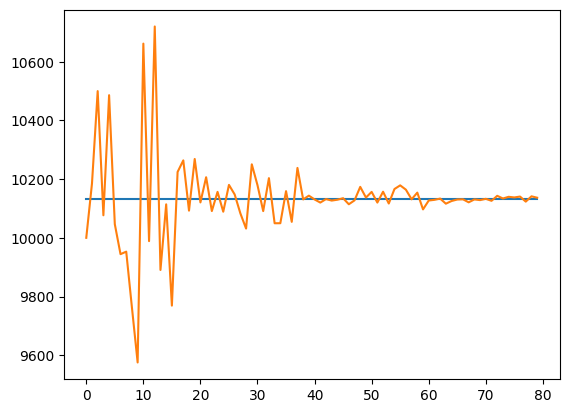

In [63]:
import torch
from mltool.visualization import *
N = 100
A = torch.randn(N,N)
esitmates=[]
for B in [1e2,1e3,1e4,1e5]:
    for _ in range(20):
        v = torch.randn(int(B),N)# <-- support [-1,1] or any random number 
        esitmates.append(torch.mean(torch.einsum('ij,bi->bj',A,v).norm(dim=1)**2))
real_val = A.norm()**2    
xrange = list(range(len(esitmates)))
plt.plot(xrange, [real_val]*len(esitmates))
plt.plot(xrange, esitmates)

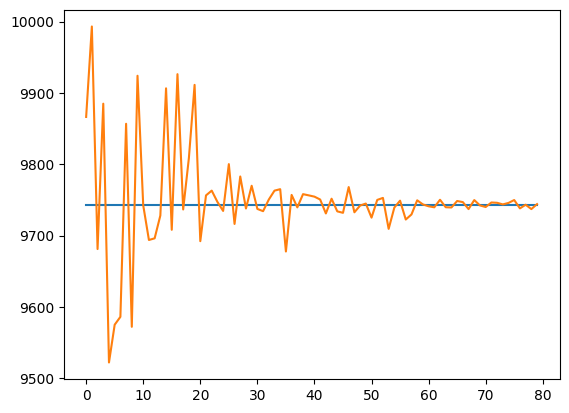

In [79]:
import torch
from mltool.visualization import *
N = 100
A = torch.randn(N,N)
esitmates=[]
for B in [1e2,1e3,1e4,1e5]:
    for _ in range(20):
        v = torch.randint(0,2,size=(int(B),N))*2-1.0# <-- [-1,1] may perform better?
        esitmates.append(torch.mean(torch.einsum('ij,bi->bj',A,v).norm(dim=1)**2))
real_val = A.norm()**2    
xrange = list(range(len(esitmates)))
plt.plot(xrange, [real_val]*len(esitmates))
plt.plot(xrange, esitmates)

#### Rectangle Matrix

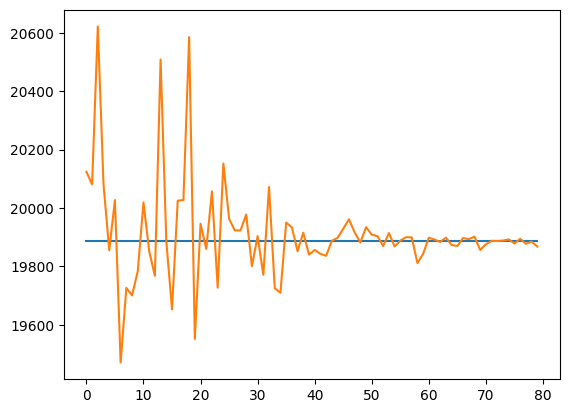

In [112]:
import torch
from mltool.visualization import *
N = 100
M = 200
A = torch.randn(N,M)
esitmates=[]
for B in [1e2,1e3,1e4,1e5]:
    for _ in range(20):
        v = torch.randn(int(B),N)
        esitmates.append(torch.mean(torch.einsum('ij,bi->bj',A,v).norm(dim=1)**2))
real_val = A.norm()**2
xrange = list(range(len(esitmates)))
plt.plot(xrange, [real_val]*len(esitmates))
plt.plot(xrange, esitmates)

In [60]:
a=torch.rand(10,20)
print(a.norm()**2)
print(torch.sum(a**2))

tensor(4.1523)
tensor(4.1523)


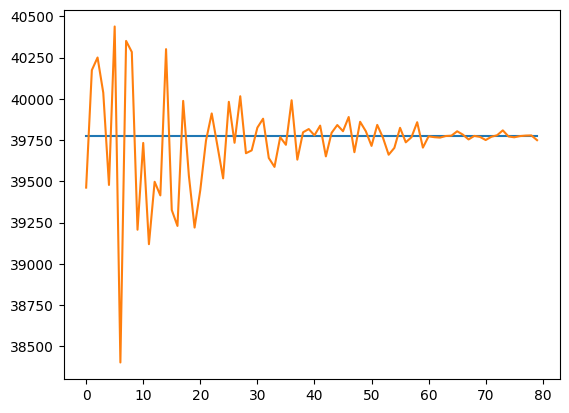

In [62]:
import torch
from mltool.visualization import *
N = 200
M = 200
A = torch.randn(N,M)
esitmates=[]
for B in [1e2,1e3,1e4,1e5]:
    for _ in range(20):
        v = torch.randn(int(B),N)
        esitmates.append(torch.mean(torch.einsum('ij,bi->bj',A,v).norm(dim=1)**2))
real_val = A.norm()**2   
xrange = list(range(len(esitmates)))
plt.plot(xrange, [real_val]*len(esitmates))
plt.plot(xrange, esitmates)

### Test_2: $Var[vBv]=Var[vAA^Tv^T] =Var[||vA||^2_2] =2(||B||_F^2-\sum_{i=1}^nB_{ii}^2), B = AA^T$

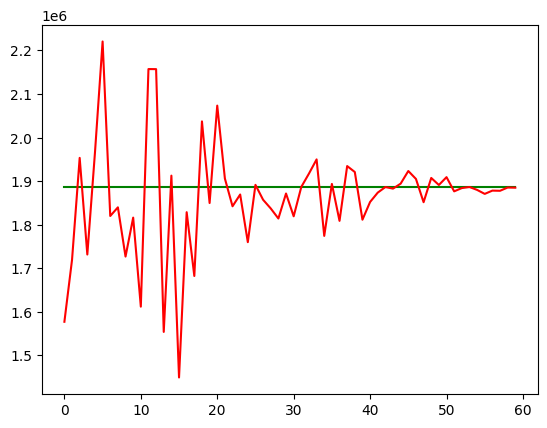

In [77]:
import torch
from mltool.visualization import *
N = 100
A = torch.randn(N,N)
B = A@(A.T)
esitmates=[]
for Batch in [1e2,1e3,1e4]:
    for _ in range(20):
        v = torch.randint(0,2,size=(int(Batch),N))*2-1.0 # <-- only support [-1,1]
        esitmates.append(torch.var(torch.einsum('ij,bi->bj',A,v).norm(dim=1)**2))
real_val = 2*(B.norm()**2  -  torch.sum(B.diag()**2)  )
xrange = list(range(len(esitmates)))
plt.plot(xrange, [real_val]*len(esitmates),'g')
plt.plot(xrange, esitmates,'r')

### Test_3:$\frac{1}{m}\sum_{i=1}^m ||(<a_i \otimes b_i| A_1\otimes A_2|)||^2_2  = \frac{1}{m}\sum_{i=1}^m (||a_i A_1||_2^2)( ||b_i A_2||_2^2) \approx ||A_1\otimes A_2||^2_2$ where  A is result of a tensor product

In [94]:
real_val

tensor(779.1886)

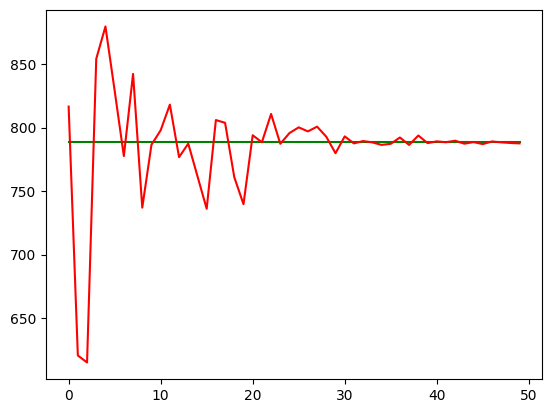

In [118]:
import torch
from mltool.visualization import *
N = 10
A1= torch.randn(N,N)
A2= torch.randn(N,N)
A = torch.einsum("ba,bc->bac",A1,A2).flatten(1,2)

esitmates=[]
for B in [1e2,1e3,1e4,1e5,1e6]:
    for _ in range(10):
        #a = torch.randint(0,2,size=(int(B),N))*2-1.0# <-- support [-1,1] or any random number 
        #b = torch.randint(0,2,size=(int(B),N))*2-1.0# <-- support [-1,1] or any random number 
        a = torch.randn(int(B),N)
        b = torch.randn(int(B),N)
        v1= torch.einsum('ij,bj->bi',A1,a)
        v2= torch.einsum('ij,bj->bi',A2,b)
        v = v1*v2
        esitmates.append(torch.mean(v.norm(dim=1)**2))
real_val = A.norm()**2    
xrange = list(range(len(esitmates)))
plt.plot(xrange, [real_val]*len(esitmates),'g')
plt.plot(xrange, esitmates,'r')

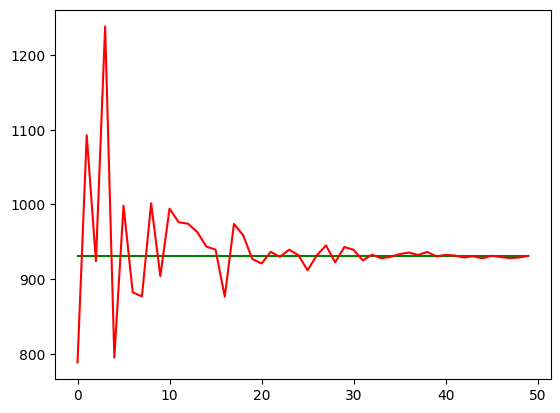

In [116]:
import torch
from mltool.visualization import *
N = 10
A1= torch.randn(N,N)
A2= torch.randn(N,N)
A = torch.einsum("ba,bc->bac",A1,A2).flatten(1,2)

esitmates=[]
for B in [1e2,1e3,1e4,1e5,1e6]:
    for _ in range(10):
        #a = torch.randint(0,2,size=(int(B),N))*2-1.0# <-- support [-1,1] or any random number 
        #b = torch.randint(0,2,size=(int(B),N))*2-1.0# <-- support [-1,1] or any random number 
        a = torch.randn(int(B),N)
        b = torch.randn(int(B),N)
        v = torch.einsum("ba,bc->bac",a,b).flatten(1,2)
        #print(v.shape)
        #print(A.shape)
        esitmates.append(torch.mean(torch.einsum('ij,bj->bi',A,v).norm(dim=1)**2))
real_val = A.norm()**2    
xrange = list(range(len(esitmates)))
plt.plot(xrange, [real_val]*len(esitmates),'g')
plt.plot(xrange, esitmates,'r')

### Test_4: $L2 =\sum_\gamma [\sum_\alpha (J_\alpha^{\gamma})^2-1]^2=||L_{k}^{\gamma}||^2- 2 ||J||_2^2$

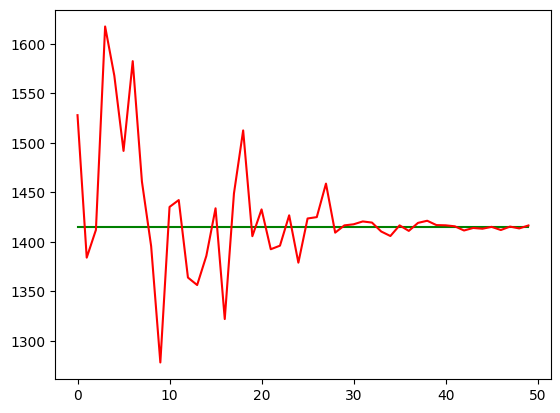

In [124]:
import torch
from mltool.visualization import *
N = 10
J = torch.randn(N,N)
L = torch.einsum("ba,bc->bac",J,J).flatten(1,2)

esitmates=[]
for B in [1e2,1e3,1e4,1e5,1e6]:
    for _ in range(10):
        #a = torch.randint(0,2,size=(int(B),N))*2-1.0# <-- support [-1,1] or any random number 
        #b = torch.randint(0,2,size=(int(B),N))*2-1.0# <-- support [-1,1] or any random number 
        a = torch.randn(int(B),N)
        b = torch.randn(int(B),N)
        c = torch.randn(int(B),N)
        v1= torch.einsum('ij,bj->bi',J,a)
        v2= torch.einsum('ij,bj->bi',J,b)
        v = v1*v2
        v3= torch.einsum('ij,bi->bj',J,c)
        esitmates.append(torch.mean(v.norm(dim=1)**2) - 2*torch.mean(v3.norm(dim=1)**2))
real_val = L.norm()**2- 2*J.norm()**2
xrange = list(range(len(esitmates)))
plt.plot(xrange, [real_val]*len(esitmates),'g')
plt.plot(xrange, esitmates,'r')

# Jacobian for training

In [125]:
import torch
import torch.nn.functional as F
import functorch
from functorch import jacrev
from functorch import make_functional, vmap, grad

In [126]:
class MyModel(torch.nn.Module):
    def __init__(self, in_chan, out_chan):
        super().__init__()
        self.backbone = torch.nn.Linear(in_chan, out_chan,bias=False)
    def forward(self,x):
        return self.backbone(x)**2

In [127]:
import torch
from functorch import make_functional, vmap, grad
model= MyModel(3, 4)
x    = torch.randn(7, 3)
func_model, params = make_functional(model)
w    = params[0]
batch_J= vmap(jacrev(func_model, argnums=1), (None, 0))(params, x)
batch_H= jacrev(vmap(jacrev(func_model, argnums=1), (None, 0)), argnums=0)(params, x)

In [4]:
batch_J.shape

torch.Size([7, 4, 3])

这里设定
$$
Y=(W^TX)^2 则 Y_{j}=(\sum W_{jk}X_k)^2
$$

那么 
$$
\frac{dY_{j}}{dX_{\alpha}}=2 (\sum W_{jk}X_k) (\sum W_{jk}\delta_{\alpha k})=2 (\sum W_{jk}X_k) W_{j\alpha}
$$

首先来看 Jacobian 

In [6]:
y1 = torch.einsum('ij,bj->bi',w,x)
yx = 2*torch.einsum('bi,ik->bik',y1,w)
print(torch.allclose(yx,batch_J))

True


再来看 Hessian

那么 
$$
\begin{align}
\frac{d^2Y_{j}}{dW_{\beta\gamma}dX_{\alpha}}
&=\frac{d}{dW_{\beta\gamma}}\frac{dY_{j}}{dX_{\alpha}}=2 \frac{d}{dW_{\beta\gamma}}(\sum_k W_{jk}X_k) W_{j\alpha}\\
&=2 (\sum_k \delta_{jk}^{\beta\gamma} X_k)  W_{j\alpha} + 2 (\sum_k W_{jk}X_k)\delta_{j\alpha}^{\beta\gamma}\\
&=2 (\delta_{j}^{\beta} X_{\gamma})W_{j\alpha} +2 (\sum_k W_{jk}X_k)\delta_{j}^{\beta}\delta_{\alpha}^{\gamma}
\end{align}
$$

In [5]:
dta1 = torch.eye(w.shape[0],w.shape[0])
dta2 = torch.eye(w.shape[1],x.shape[1])

h=2*torch.einsum('bj,Bg,ja   ->Bjabg',dta1,x,w) \
 +2*torch.einsum('jk,Bk,bj,ga->Bjabg',w,x,dta1,dta2)
print(torch.allclose(h,batch_H[0]))

True


#### 我们也可以直接来计算正则项的导数
$$
P^{\gamma}=< y^\gamma,t^\gamma >+\lambda_1 (\sum_\alpha J_\alpha^{\gamma}-1)^2+\lambda_2 [\sum_\alpha (J_\alpha^{\gamma})^2-1]^2
$$

如果我们的函数是 $Y = (WX)**2$ 即 $y_j = (\sum_k W_{jk}X_k)^2$ 那么

$$
J_\alpha^\gamma = \frac{dY_{\gamma}}{dX_{\alpha}}=2 (\sum_k W_{\gamma k}X_k) (\sum_k W_{\gamma k}\delta_{\alpha k})=2 (\sum_k W_{\gamma k}X_k) W_{\gamma\alpha}
$$

那么我们可以显式的得到 
$$
\sum_\alpha J_\alpha^{\gamma} = \sum_\alpha 2 (\sum_k W_{\gamma k}X_k) W_{j\alpha} = 2 (\sum_k W_{\gamma k}X_k) \sum_\alpha W_{\gamma\alpha}
$$

我们的 L1 约束是对每一个上标 $(\sum_\alpha J_\alpha^{\gamma}-1)^2$ 都极小, 在这个 toy 模型里面, $\gamma$ 只是 $W$ 的某一行, 所以我们现在去掉上标 $W_{\gamma k}\rightarrow w_k$, 得到
$$
P(w) = <w|x><w|\mathbf{1}>
$$
再给定 |x> 的情况下, 我们要观察 $P(w) =1$ 这个解是否存在, 以及他是否是 $(P(w)-1)^2$ 的极小值解.

注意 |x> 是一个 batch tensor, 意思是我们会要求所有的 x 都要满足 $P(w;x) =1$

我们不妨假设 $\sum_\alpha w_{\alpha} = 1/\Lambda$ 为一个常数. 那么就得到方程组(n个未知数,一个方程,必有解, 如果有B个 Batch 那么总的方程数是B, 所以最后存在解的条件就是参数量要大于数据量)
$$
w_1+w_2+\dots+w_n = 1/\Lambda\\
w_1x_1+w_2x_2+\dots+w_nx_n = \Lambda
$$
有柯西不等式和基本不等式
$$
\Lambda = \sum_i (w_ix_i) \leq \sqrt{\sum_i w_i^2 \sum_i x_i^2} \leq \sqrt{(\sum_i w_i)^2 \sum_i x_i^2} = |\frac{1}{\Lambda}| \sqrt{ \sum_i x_i^2}
$$
也就是
$$
\Lambda^2 \leq \sqrt{ \sum_i x_i^2}
$$

###### 测试随机化结果下，L1 和 L2 的 variation 的 renormalization

我们的归一化系数是由以下假设得到的：
- Jacobian 中的系数在初始化的时候满足正态分布。

得到 L1 的归一化系数为 $2n^2 +4n$

得到 L2 的归一化系数为 $8n^3 + 24n^2 + 24n$

这里的$n$为 $\sum_\alpha$ 的 $\alpha$ 的数量

这一假设实际上在任何时候都不成立，比如我们这里取的 $Y=(WX)^2$ 的例子。

当然， 这样一个缩放系数依旧可以控制量级。

一个有效的做法 是设置合适 $\lambda_1$ 和 $\lambda_2$ 来强制调控这个因子到一个合适的缩放范围。

In [1]:
from model.GradientModifier import *

In [64]:
B=1
I=10
O=30
class MyModel(torch.nn.Module):
    def __init__(self, in_chan, out_chan):
        super().__init__()
        self.backbone = torch.nn.Linear(in_chan, out_chan,bias=False)
    def forward(self,x):
        return self.backbone(x)**2
model= MyModel(I, O)
x    = torch.randn(B, I)
cotangents = torch.ones(B,I)
y = torch.randn(B,O)


In [78]:
grad_modifier = NGmod_absolute(1,1,100,do_unit_renormalize=True)

In [79]:
# the jacobian mean and std
Jstds=[]
Jmean=[]
L1es=[]
L2es=[]
for _ in range(100):
    _=torch.nn.init.normal_(model.backbone.weight)
    grad_modifier.func_model, params = make_functional(model)
    x    = torch.randn(B, I)
    std,mean = torch.std_mean(vmap(jacrev(grad_modifier.func_model, argnums=1), (None, 0))(params, x))
    Jstds.append(std.item())
    Jmean.append(mean.item())
    L1es.append(grad_modifier.Normlization_Term_1(params,x).item())
    L2es.append(grad_modifier.Normlization_Term_2(params,x,None).item())

In [59]:
from mltool.visualization import *

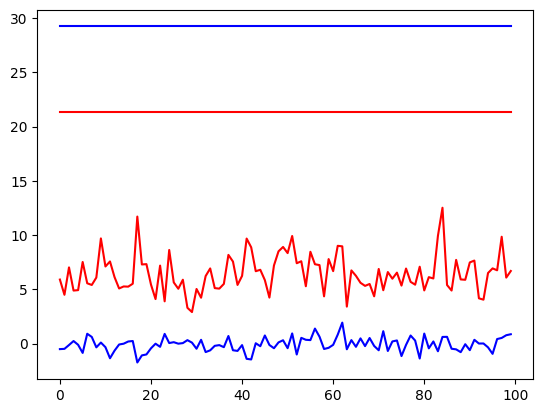

In [81]:
%matplotlib inline
plt.plot(Jstds,'r')
plt.plot(Jmean,'b')
plt.plot([np.std(L1es)]*len(Jstds),'r-')
plt.plot([np.mean(L1es)]*len(Jstds),'b-')

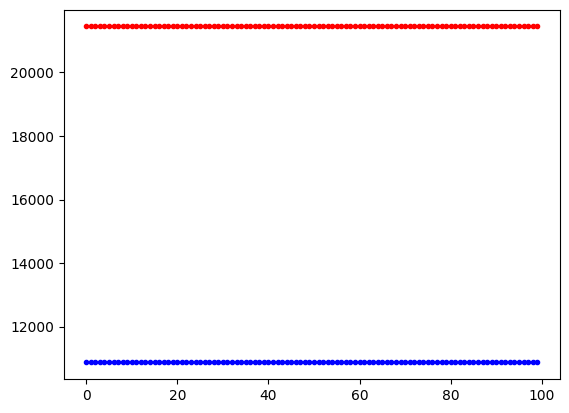

In [82]:
plt.plot([np.std(L2es)]*len(Jstds),'r.')
plt.plot([np.mean(L2es)]*len(Jstds),'b.')

###### 验证 estimate 的效果


- $||A||_F^2=Tr(AA^T) = \frac{1}{m}\sum_i^m v_i AA^T v_i^T$

In [22]:
O = 100
I = 50 
sample_times = 100
A = torch.randn(O,I)
v = torch.randint(2,(100, O))*2-1
v = v.float()
ground_truth = (A**2).sum()
estima_value = torch.einsum('bi,ij,lj,bl->b',v,A,A,v).mean()
estima_value2= torch.sum(torch.einsum('bi,ij->bj',v,A)**2,dim=-1).mean(0)
print(ground_truth)
print(estima_value)
print(estima_value2)

tensor(5052.1685)
tensor(5210.1504)
tensor(5210.1504)


$$
2(||A||_F^2 - \sum_{i}^n A_{ii}^2)=Var(v A v^T) \quad where \quad v\sim 
\{\begin{align}
    &+1 ，50\%\\
    &-1，50\%
\end{align}
$$

sample_times 没必要太大就有比较好的效果

  0%|          | 0/100 [00:00<?, ?it/s]

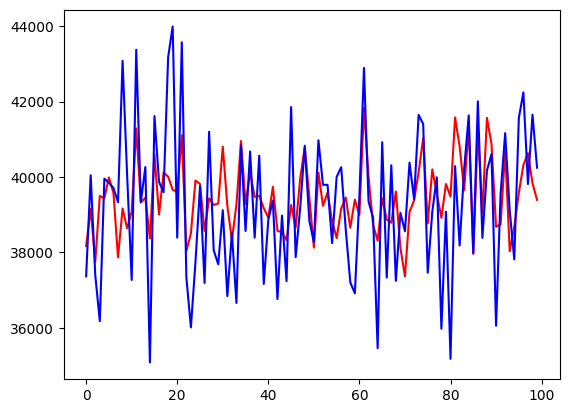

In [480]:
glist=[]
elist=[]
for _ in tqdm(range(100)):
    O = 100
    sample_times = 1000
    A = torch.randn(O,O) 
    A = A+A.transpose(1,0)
    v = torch.randint(2,(sample_times, O))*2-1
    v = v.float()
    ground_truth = 2*((A**2).sum() - (A**2).trace())
    estima_value = torch.einsum('bi,il,bl->b',v,A,v).var()
    glist.append(ground_truth)
    elist.append(estima_value)
plt.plot(glist,'r')
plt.plot(elist,'b')

- $\sum_{i}^n A_{ii}^2 =   ||A||_F^2 - Var(\sum_i^m v_i A v_i^T)/2$

sample_times 需要比较大才有好效果

In [440]:
import pandas as pd
import plotly.express as px

In [7]:
glist=[]
elist=[]
vlist=[]
for _ in tqdm(range(30)):
    O = 100
    sample_times = 1000
    A = torch.randn(O,O) 
    A = A+A.transpose(1,0)
    v = torch.randint(2,(sample_times, O))*2-1
    v = v.float()
    ground_truth = (A**2).sum()
    estima_value = (A**2).trace()
    var = torch.einsum('bi,il,bl->b',v,A,v).var()/2
    vlist.append(var.item())
    glist.append(ground_truth.item())
    elist.append(estima_value.item())

NameError: name 'tqdm' is not defined

In [1]:
# data = []
# xmap ={}
# for i,(v,s,t) in enumerate(zip(vlist,glist,elist)):
#     data.append([r"$ ||A||_F^2 $",s,i+0.24])  
    
#     data.append([r"$Var(v A v^T)/2$",v,i])  
#     data.append([r"$\sum_{i}^n A_{ii}^2$",t,i])  
    
# names_col = ['layer','value', 'block']
# plot_df = pd.DataFrame(data=data,columns=names_col)
# fig = px.bar(plot_df, x='block', y='value', color='layer' ,title='My plot',height=600)
# fig.update_layout(showlegend=True) 
# fig.show()

$\sum_\beta\sum_{\alpha\neq\beta} J_\alpha^{\gamma}J_\beta^{\gamma} \rightarrow 0$

In [102]:
B=1
I=10
O=30
model= MyModel(I, O).cuda()
x    = torch.randn(B, I).cuda()
y    = torch.randn(B, O).cuda()
shape = y.shape
sample_times=1000
func_model, params =  make_functional(model)

In [82]:
def CorrelationTerm(params,x,cotangents_variable):
    '''
    \sum_\beta\sum_{\alpha\neq\beta} J_\alpha^{\gamma}J_\beta^{\gamma}
    '''
    J = vmap(jacrev(func_model, argnums=1), (None, 0))(params, x) #(B, O, I)
    B, O, I =J.shape
    K = torch.ones(I,I) - torch.eye(I,I)
    K = K.to(J.device)
    # L^\gamma = \sum_\beta\sum_{\alpha\neq\beta} J_\alpha^{\gamma}J_\beta^{\gamma}
    C = torch.einsum('bij,jk,bik->bi',J,K,J) #(B,O)  L^\gamma
    C = (C**2).sum(-1) #(B) \sum_\gamma (L^\gamma)^2
    return C

In [83]:
def TrvJOJv_and_ETrAAT(params,x,cotangents_variable):
    _, vJ_fn = functorch.vjp(lambda x:func_model(params,x), x)
    vJ   = vJ_fn(cotangents_variable)[0]
    dims = list(range(1,len(vJ.shape)))
    vJO  = vJ.sum(dims,keepdims=True)-vJ # <vJ|1-I|
    vJOJv= (vJ*vJO).sum(dims)#should sum over all dimension except batch
    return vJOJv, functorch.jvp(lambda x:func_model(params,x), (x,), (vJO,))[1].norm()# average the batch_size also

In [84]:
def Normlization_Term_2(params,x,cotangents_variables):
    TrvJOJvs,ETrAATs =  vmap(TrvJOJv_and_ETrAAT, (None, None, 0 ))(params, x,cotangents_variables)
    return ETrAATs.mean() - torch.var(TrvJOJvs,0).mean()

In [96]:
with torch.no_grad():
    ground_truth = CorrelationTerm(params,x,None)[0]
    print(ground_truth)

tensor(7.7047, device='cuda:0')


In [103]:
grad_modifier = Nodal_GradientModifier(1,0)

In [119]:
with torch.no_grad():
    grad_modifier.func_model, params =  make_functional(model)
    cotangents_variables = torch.randint(2,(sample_times,*shape)).cuda()*2-1
    ETrAATs  = vmap(grad_modifier.get_ETrAAT, (None, None, 0 ))(params, x,cotangents_variables)
    cotangents_variables = torch.randint(2,(sample_times,*shape)).cuda()*2-1
    TrvJOJvs = vmap(grad_modifier.get_TrvJOJv, (None, None, 0 ))(params, x,cotangents_variables)

In [110]:
ETrAATs.mean()

tensor(9.4774, device='cuda:0')

###### 验证带上 Jacobian 矩阵之后的估计是否准确

- $||A||_F^2=||J(\mathbf{1}-I)J||_F^2=Tr[J(\mathbf{1}-I)J^T J(\mathbf{1}-I)J^T]=<v|J(\mathbf{1}-I)J^T|J(\mathbf{1}-I)J^T|v^T>$

In [29]:
### estimate
shape = y.shape
sample_times=1000
def get_ETrAAT(params,x,cotangents_variable):
    _, vJ_fn = functorch.vjp(lambda x:func_model(params,x), x)
    vJ   = vJ_fn(cotangents_variable)[0]
    vJO  = vJ.sum(1,keepdims=True)-vJ # <vJ|1-I|
    ETrAAT = functorch.jvp(lambda x:func_model(params,x), (x,), (vJO,))[1] # (B,Ouputdim)
    dims = list(range(1,len(ETrAAT.shape)))
    ETrAAT=torch.sum(ETrAAT**2,dim=dims)
    return ETrAAT
def get_TrvJOJv(params,x,cotangents_variable):
        _, vJ_fn = functorch.vjp(lambda x:func_model(params,x), x)
        vJ   = vJ_fn(cotangents_variable)[0]
        dims = list(range(1,len(vJ.shape)))
        vJO  = vJ.sum(1,keepdims=True)-vJ # <vJ|1-I|
        vJOJv= (vJO*vJ).sum(dim=dims)#should sum over all dimension except batch
        return vJOJv

- $\sum_\gamma A_{\gamma\gamma}^2=||A||_F^2 - Var[Tr_m(A)]/2 \quad where \quad A=J(\mathbf{1}-I)J^T$

In [83]:
B=1
I=10
O=30
model= MyModel(I, O).cuda()
x    = torch.randn(B, I).cuda()
y    = torch.randn(B, O).cuda()

func_model, params = make_functional(model)
J = vmap(jacrev(func_model, argnums=1), (None, 0))(params, x) #(B, O, I)
B, O, I =J.shape
K = torch.ones(I,I) - torch.eye(I,I)
K = K.to(J.device)
# L^\gamma = \sum_\beta\sum_{\alpha\neq\beta} J_\alpha^{\gamma}J_\beta^{\gamma}
C = torch.einsum('bij,jk,bpk->bip',J,K,J) #(B)  L^\gamma
real_result = (C**2).sum(dim=(-1,-2))
real_diagnol = (C**2)[0].trace()

In [84]:
cotangents_variables = torch.randint(2,(sample_times,*shape)).cuda()*2-1
estimate_result = vmap(get_ETrAAT, (None, None, 0 ))(params, x,cotangents_variables).mean(0)
estimate_TrvJOJv = vmap(get_TrvJOJv, (None, None, 0 ))(params, x,cotangents_variables).var(0)/2

print(real_result)
print(estimate_result)
print(real_result[0]-estimate_TrvJOJv[0])
print(real_diagnol)

tensor([141.5324], device='cuda:0', grad_fn=<SumBackward1>)
tensor([145.3345], device='cuda:0', grad_fn=<MeanBackward1>)
tensor(16.3529, device='cuda:0', grad_fn=<SubBackward0>)
tensor(19.9297, device='cuda:0', grad_fn=<TraceBackward0>)


#### 训练测试

In [ ]:
# from model.afnonet import AFNONet
# model = AFNONet((32,64),2,1,1).cuda()
# func_model, params = make_functional(model)
# x = torch.randn(4,1,32,64).cuda()
# cotangents=torch.ones_like(x)

In [ ]:
# from pytorch_memlab import MemReporter
# reporter = MemReporter()
# reporter.report()

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import torch
import torch.nn.functional as F
import functorch
from functorch import jacrev,jacfwd
from functorch import make_functional, vmap, grad,make_functional_with_buffers
import torch

In [16]:
# from model.afnonet import AFNONet
# model = AFNONet((32,64),2,110,110).cuda()
# func_model, params = make_functional(model)
# x = torch.randn(4,110,32,64).cuda()
# y = torch.randn(4,110,32,64).cuda()
# optimzer= torch.optim.Adam(model.parameters())
# shape = x.shape

In [33]:
############## from model.GradientModifier import *
class Nodal_GradientModifier:
    def __init__(self, lambda1=1, lambda2=1, sample_times=100, do_unit_renormalize=False,L1_level=1,L2_level=1):
        self.lambda1 = lambda1
        self.lambda2 = lambda2
        self.sample_times = sample_times 
        self.cotangents_sum_along_x_dimension = None
        self.do_unit_renormalize = do_unit_renormalize
        self.L1_level = L1_level
        self.L2_level = L2_level
    def Normlization_Term_1(self, params, x, return_abs_value=False):
        if self.cotangents_sum_along_x_dimension is None or self.cotangents_sum_along_x_dimension.shape != x.shape:
            self.cotangents_sum_along_x_dimension = torch.ones_like(x)
        tvalues= functorch.jvp(lambda x: self.func_model(params, x),
                  (x,), (self.cotangents_sum_along_x_dimension,))[1]
        values = ((tvalues-1)**2).mean()
        #(B, Outputdim) -> (1,)
        N = np.prod(x.shape[1:])
        if self.do_unit_renormalize:
            # the varation of L1 for iid normal distribution is around 2n^2 + 4n
            coef   = 2*np.power(N, 2) + 4*N
            values = values/np.sqrt(coef)
        if return_abs_value:
            return values, tvalues.abs().mean()
        return values    
    def TrvJOJv_and_ETrAAT(self,params,x,cotangents_variable):
        # compute projection on vector `cotangent` only once.
        _, vJ_fn = functorch.vjp(lambda x:self.func_model(params,x), x)
        vJ   = vJ_fn(cotangents_variable)[0]
        dims = list(range(1,len(vJ.shape)))
        vJO  = vJ.sum(dims,keepdims=True)-vJ # <vJ|1-I|
        vJOJv= (vJO*vJ).sum(dim=dims)# <vJ|1-I|Jv> #should sum over all dimension except batch
        #vJOJv= vJOJv/np.sqrt(torch.prod(self.output_shape).item())
        ETrAAT = functorch.jvp(lambda x:self.func_model(params,x), (x,), (vJO,))[1] # (B,Ouputdim)
        # <vJ|1-I|J^T | J|1-I|J^Tv> = < k| J^T | J |k> where the  <k| = <vJ|
        # the `ETrAAT` now is just the < k| J^T |
        dims = list(range(1,len(ETrAAT.shape)))
        ETrAAT=torch.sum(ETrAAT**2,dim=dims)
        # the `ETrAAT` now is just the < k| J^T | J |k> 
        return vJOJv, ETrAAT# DO NOT average the batch_size also
    def get_TrvJOJv(self,params,x,cotangents_variable):
        _, vJ_fn = functorch.vjp(lambda x:self.func_model(params,x), x)
        vJ   = vJ_fn(cotangents_variable)[0]
        dims = list(range(1,len(vJ.shape)))
        vJO  = vJ.sum(1,keepdims=True)-vJ # <vJ|1-I|
        vJOJv= (vJO*vJ).sum(dim=dims)#should sum over all dimension except batch
        #vJOJv= vJOJv/np.sqrt(torch.prod(self.output_shape).item()) # notice we will do var later, so should get sqrt
        return vJOJv
    def get_ETrAAT(self,params,x,cotangents_variable):
        _, vJ_fn = functorch.vjp(lambda x:self.func_model(params,x), x)
        vJ   = vJ_fn(cotangents_variable)[0]
        vJO  = vJ.sum(1,keepdims=True)-vJ # <vJ|1-I|
        ETrAAT = functorch.jvp(lambda x:self.func_model(params,x), (x,), (vJO,))[1] # (B,Ouputdim)
        dims = list(range(1,len(ETrAAT.shape)))# (B,Ouputdim)
        ETrAAT=torch.sum(ETrAAT**2,dim=dims)# (B,Ouputdim) 
        return ETrAAT
    def get_ETrAAT_times(self,params,x,cotangents_variables):
        return vmap(self.get_ETrAAT, (None, None, 0 ))(params, x,cotangents_variables).mean()
    def get_TrvJOJv_times(self,params,x,cotangents_variables):
        return vmap(self.get_TrvJOJv, (None, None, 0 ))(params, x,cotangents_variables).mean()
    def Estimate_L2_once(self,params,x,cotangents1,cotangents2,cotangents3):
        """$L2 =\sum_\gamma [\sum_\alpha (J_\alpha^{\gamma})^2-1]^2=||L_{k}^{\gamma}||^2- 2 ||J||_2^2$
        Notice the ture L2 need a shift vaule equal to outshape
        ----------------------------------------
        import torch
        from mltool.visualization import *
        N = 10
        J = torch.randn(N,N)
        L = torch.einsum("ba,bc->bac",J,J).flatten(1,2)

        esitmates=[]
        for B in [1e2,1e3,1e4,1e5,1e6]:
            for _ in range(10):
                #a = torch.randint(0,2,size=(int(B),N))*2-1.0# <-- support [-1,1] or any random number 
                #b = torch.randint(0,2,size=(int(B),N))*2-1.0# <-- support [-1,1] or any random number 
                a = torch.randn(int(B),N)
                b = torch.randn(int(B),N)
                c = torch.randn(int(B),N)
                v1= torch.einsum('ij,bj->bi',J,a)
                v2= torch.einsum('ij,bj->bi',J,b)
                v = v1*v2
                v3= torch.einsum('ij,bi->bj',J,c)
                esitmates.append(torch.mean(v.norm(dim=1)**2) - 2*torch.mean(v3.norm(dim=1)**2))
        real_val = L.norm()**2- 2*J.norm()**2
        xrange = list(range(len(esitmates)))
        plt.plot(xrange, [real_val]*len(esitmates),'g')
        plt.plot(xrange, esitmates,'r')
        """
        # in order to avoid large value, we will divide len(output_shape)
        # this equal to make the offset value in L2 become 1
        vL1 = functorch.jvp(lambda x:self.func_model(params,x), (x,), (cotangents1,))[1] #(B, output_size)
        vL2 = functorch.jvp(lambda x:self.func_model(params,x), (x,), (cotangents2,))[1] #(B, output_size)
        dims = list(range(1,len(vL1.shape)))
        coef = np.sqrt(np.prod(vL1.shape[1:]))
        vL   = ((vL1/coef*vL2)**2).sum(dim=dims)
        vJ  = functorch.jvp(lambda x:self.func_model(params,x), (x,), (cotangents3,))[1] #(B, output_size)
        vJ   = ((vJ/coef)**2).sum(dim=dims)**2
        esitimate = vL - 2*vJ + 1 #(B, 1)
        return esitimate
    def inference(self,model,x,y, strict=True,return_abs_value=True):
        back_to_train_mode = model.training
        model.eval()
        buffers=[]
        if not strict:buffers = list(model.buffers())
        if len(buffers) > 0:
            func_model,params, buffer = make_functional_with_buffers(model, disable_autograd_tracking=True)
            self.func_model = lambda params, x: func_model(params, buffer, x)
        else:
            self.func_model, params = make_functional(model,disable_autograd_tracking=True)
        #self.func_model, params = make_functional(model,disable_autograd_tracking=True)
        self.output_shape = y.shape
        #with torch.no_grad():  # may occur unknow error when using make ---> RuntimeError: Mask should be Bool Scalar TypeFloat
        L11=L12=-1
        if self.lambda1 != 0:
            if return_abs_value:
                L11,L12=self.Normlization_Term_1(params, x,return_abs_value)
                L11=L11.item()
                L12=L12.item()
            else:
                L11=self.Normlization_Term_1(params, x,return_abs_value).item()
        
        L2=self.Normlization_Term_2(params, x).item() if self.lambda2 != 0 else -1
        if back_to_train_mode:model.train()
        return L11,L12,L2
    def backward(self,model, x, y, strict=True):
        
        model.eval()
        buffers=[]
        if not strict:buffers = list(model.buffers())
        if len(buffers) > 0:
            self.func_model,params, buffer = make_functional_with_buffers(model, disable_autograd_tracking=True)
            self.func_model = lambda params, x: func_model(params, buffer, x)
        else:
            self.func_model, params = make_functional(model,disable_autograd_tracking=True)

        self.output_shape       = y.shape[1:]
        with torch.no_grad():
            if self.lambda1 != 0:
                Derivation_Term_1 = jacrev(self.Normlization_Term_1, argnums=0)(params, x)
            if self.lambda2 != 0:
                Derivation_Term_2 = jacrev(self.Normlization_Term_2, argnums=0)(params, x)
        model.train()
        for i, param in enumerate(model.parameters()):
            delta_p = 0
            if self.lambda1 != 0:delta_p += self.lambda1*Derivation_Term_1[i]
            if self.lambda2 != 0:delta_p += self.lambda2*Derivation_Term_2[i]
            if param.grad is not None:
                param.grad.detach().add_(delta_p.to(param.device)/2)# this coding style is for multiGPU usage
                #param.grad.data += delta_p
            else:
                param.grad = delta_p.to(param.device)
    def getL1loss(self,model,x):
        if self.cotangents_sum_along_x_dimension is None or self.cotangents_sum_along_x_dimension.shape != x.shape:
            self.cotangents_sum_along_x_dimension = torch.ones_like(x)
        tvalues= functorch.jvp(model,(x,), (self.cotangents_sum_along_x_dimension,))[1]
        values = ((tvalues-1)**2).mean()
        return values
    def getL2loss(self,model,x):
        raise NotImplementedError

class NGmod_absolute(Nodal_GradientModifier):
    def Normlization_Term_2(self,params,x):
        dims   = [-t for t in range(1,len(x.shape))]
        dims.reverse()                         
        values = (((vmap(jacrev(self.func_model, argnums=1), (None, 0),randomness='same')(params, x)**2).sum(dim=dims)-1)**2).mean()
        N      = np.prod(x.shape[1:])
        if self.do_unit_renormalize: 
            coef = 8*np.power(N,3) + 24*np.power(N,2) + 24*N
            values = values/np.sqrt(coef)
            # the varation of L2 for iid normal distribution is around 8n^3 + 24n^2 + 24n
        return values
        
    def getL2loss(self,model,x):
        dims   = [-t for t in range(1,len(x.shape))]
        dims.reverse()             
        values = (((vmap(jacrev(model), (0,),randomness='same')(x,)**2).sum(dim=dims)-1)**2).mean()
        return values
class NGmod_absolute_set_level(NGmod_absolute):
    def new_Normlization_Term_1(self, params, x):
        return (self.Normlization_Term_1(params, x) - self.L1_level)**2
    def backward(self,model, x, y, strict=True):
        
        model.eval()
        buffers=[]
        if not strict:buffers = list(model.buffers())
        if len(buffers) > 0:
            func_model,params, buffer = make_functional_with_buffers(model, disable_autograd_tracking=True)
            self.func_model = lambda params, x: func_model(params, buffer, x)
        else:
            self.func_model, params = make_functional(model,disable_autograd_tracking=True)
        
        self.output_shape       = y.shape[1:]

        with torch.no_grad():
            if self.lambda1 != 0:
                Derivation_Term_1 = jacrev(self.new_Normlization_Term_1, argnums=0)(params, x)
            if self.lambda2 != 0:
                Derivation_Term_2 = jacrev(self.Normlization_Term_2, argnums=0)(params, x)
        model.train()
        for i, param in enumerate(model.parameters()):
            delta_p = 0
            if self.lambda1 != 0:delta_p += self.lambda1*Derivation_Term_1[i]
            if self.lambda2 != 0:delta_p += self.lambda2*Derivation_Term_2[i]
            if param.grad is not None:
                param.grad.data += delta_p
            else:
                param.grad = delta_p

class NGmod_estimate_L2(Nodal_GradientModifier):
    def Normlization_Term_2(self,params,x):
        cotangents1s = torch.randint(0,2, (self.sample_times,*x.shape)).cuda()*2-1.0
        cotangents2s = torch.randint(0,2, (self.sample_times,*x.shape)).cuda()*2-1.0
        cotangents3s = torch.randint(0,2, (self.sample_times,*x.shape)).cuda()*2-1.0
        values = vmap(self.Estimate_L2_once, (None,None, 0,0,0))(params,x,cotangents1s,cotangents2s,cotangents3s).mean(0)
        values = values.mean()
        return values

    def Estimate_L2_once_model(self,model,x,cotangents1,cotangents2,cotangents3):
        # in order to avoid large value, we will divide len(output_shape)
        # this equal to make the offset value in L2 become 1
        vL1 = functorch.jvp(model, (x,), (cotangents1,))[1] #(B, output_size)
        vL2 = functorch.jvp(model, (x,), (cotangents2,))[1] #(B, output_size)
        dims = list(range(1,len(vL1.shape)))
        coef = np.sqrt(np.prod(vL1.shape[1:]))
        vL   = ((vL1/coef*vL2)**2).sum(dim=dims)
        vJ  = functorch.jvp(model, (x,), (cotangents3,))[1] #(B, output_size)
        vJ   = ((vJ/coef)**2).sum(dim=dims)**2
        esitimate = vL - 2*vJ + 1 #(B, 1)
        return esitimate
    def getL2loss(self,model,x):
        cotangents1s = torch.randint(0,2, (self.sample_times,*x.shape)).cuda()*2-1.0
        cotangents2s = torch.randint(0,2, (self.sample_times,*x.shape)).cuda()*2-1.0
        cotangents3s = torch.randint(0,2, (self.sample_times,*x.shape)).cuda()*2-1.0
        values = vmap(self.Estimate_L2_once_model, (None,None, 0,0,0))(model,x,cotangents1s,cotangents2s,cotangents3s).mean(0)
        values = values.mean()
        return values    
class NGmod_absoluteNone(NGmod_absolute):
    def backward(self,model, x, y, strict=True):
        pass
class NGmod_delta_mean(Nodal_GradientModifier):
    def Normlization_Term_2(self,params,x):
        '''
        \sum_\beta\sum_{\alpha\neq\beta} J_\alpha^{\gamma}J_\beta^{\gamma}
        '''
        J = vmap(jacrev(self.func_model, argnums=1), (None, 0))(params, x) #(B, O, I)
        B, O, I =J.shape
        K = torch.ones(I,I) - torch.eye(I,I)
        K = K.to(J.device)
        # L^\gamma = \sum_\beta\sum_{\alpha\neq\beta} J_\alpha^{\gamma}J_\beta^{\gamma}
        C = torch.einsum('bij,jk,bik->bi',J,K,J) #(B,O)  L^\gamma
        C = (C**2).sum(-1) #(B) \sum_\gamma (L^\gamma)^2
        return C.mean()



In [5]:
from tqdm.notebook import tqdm

In [12]:
# the position of gradient modifier(before `loss.backward` or after `loss.backward`) does not effect the result
##############################################################################################################
B=20
I=10
O=30
class MyModel(torch.nn.Module):
    def __init__(self, in_chan, out_chan):
        super().__init__()
        self.backbone = torch.nn.Linear(in_chan, out_chan,bias=False)
    def forward(self,x):
        return self.backbone(x)**2
model= MyModel(I, O).cuda()
x    = torch.randn(B, I).cuda()
y    = torch.randn(B, O).cuda()
func_model, params = make_functional(model)
optimizer = torch.optim.SGD(model.parameters(),1)

model.load_state_dict(torch.load('debug/model.weight.pt'))
x = torch.load('debug/input.pt')
y = torch.load('debug/ouput.pt')

#optimizer = SGD_Nodel(model.parameters(),1)
#optimzer= torch.optim.Adam(model.parameters())

accues= []
grad_modifier = Nodal_GradientModifier()
weight_beg = model.backbone.weight.cpu().detach().numpy()
# for _ in tqdm(range(1000)):
optimizer.zero_grad()

loss = F.mse_loss(model(x),y)
loss.backward()
grad_modifier.backward(model,x,y)
gradient = model.backbone.weight.grad.cpu().detach().numpy()

optimizer.step()
#     accues.append(accu.item())
weight_end = model.backbone.weight.cpu().detach().numpy()

In [4]:
# # the goal about achieve zero loss is depended on the Batch size and the number of data
# ##############################################################################################################
# %matplotlib inline
# from mltool.visualization import *
# from tqdm.notebook import tqdm

# B=20
# I=100
# O=300
# class MyModel(torch.nn.Module):
#     def __init__(self, in_chan, out_chan):
#         super().__init__()
#         self.backbone = torch.nn.Linear(in_chan, out_chan,bias=False)
#         self.normer   = torch.nn.BatchNorm1d(5)
#     def forward(self,x):
#         B = x.size(0)
#         return self.normer((self.backbone(x)**2).reshape(B,5,-1))
# model= MyModel(I, O).cuda()
# x    = torch.randn(B, I).cuda()
# y    = torch.randn(B, O).cuda()

# optimizer = torch.optim.SGD(model.parameters(),0.1)

# def Normlization_Term_1(params, x):
#     cotangents_sum_along_x_dimension = torch.ones_like(x)
#     values = ((functorch.jvp(lambda x: func_model(params, buffer, x),
#               (x,), (cotangents_sum_along_x_dimension,))[1]-1)**2).mean()
#     return values

# grad_modifier = NGmode_estimate(1,1,100)
# grad_modifier.func_model, params = make_functional(model,disable_autograd_tracking=True)
# grad_modifier.output_shape       = y.shape[1:]
# grad_modifier.Normlization_Term_2(params,x)

In [34]:
from mltool.visualization import *
from tqdm.notebook import tqdm

B=11
I=10
O=30
class MyModel(torch.nn.Module):
    def __init__(self, in_chan, out_chan):
        super().__init__()
        self.backbone = torch.nn.Linear(in_chan, out_chan,bias=False)
    def forward(self,x):
        return self.backbone(x)**2
testdata = torch.load("debug/testdata.pt")
model= MyModel(I, O).cuda()
model.load_state_dict(testdata['weight'])
x = testdata['x']
y = testdata['y']
# x    = torch.randn(B, I).cuda()
# y    = torch.randn(B, O).cuda()

In [36]:
#torch.save({"weight":model.state_dict(),"x":x,"y":y},"debug/testdata.pt")

In [49]:
model= MyModel(I, O).cuda()
model.load_state_dict(testdata['weight'])
x = testdata['x']
y = testdata['y']
grad_modifier = NGmod_absolute(0,1)
grad_modifier.backward(model,x,y)
for name,p in model.named_parameters():
    print(f"{name}.grad-->{p.grad.norm().item()}")

backbone.weight.grad-->2.744455575942993


In [48]:
model= MyModel(I, O).cuda()
model.load_state_dict(testdata['weight'])
x = testdata['x']
y = testdata['y']
L1loss = grad_modifier.getL1loss(model, x)
print(L1loss)
L1loss.backward()
for name,p in model.named_parameters():
    print(f"{name}.grad-->{p.grad.norm().item()}")

tensor(1.2182, device='cuda:0', grad_fn=<MeanBackward0>)
backbone.weight.grad-->0.8947253227233887


In [46]:
model= MyModel(I, O).cuda()
model.load_state_dict(testdata['weight'])
x = testdata['x']
y = testdata['y']
L2loss = grad_modifier.getL2loss(model, x)
print(L2loss)
L2loss.backward()
for name,p in model.named_parameters():
    print(f"{name}.grad-->{p.grad.norm().item()}")

tensor(0.9299, device='cuda:0', grad_fn=<MeanBackward0>)
backbone.weight.grad-->2.744455575942993


In [385]:
# func_model, params = make_functional(model,disable_autograd_tracking=True)

# # cotangents1s = torch.randint(0,2, (1000,*x.shape)).cuda()*2-1.0
# # cotangents2s = torch.randint(0,2, (1000,*x.shape)).cuda()*2-1.0
# # cotangents3s = torch.randint(0,2, (1000,*x.shape)).cuda()*2-1.0

# # L2loss = vmap(Estimate_L2_once, (None, None,None, 0,0,0))(func_model,params,x,cotangents1s,cotangents2s,cotangents3s).mean(0)

# values = (((vmap(jacrev(func_model, argnums=1), (None, 0),randomness='same')(params, x)**2).sum(-1)-1)**2).mean(-1)

# BJ  = vmap(jacrev(func_model, argnums=1), (None, 0),randomness='same')(params, x)
# idx=2
# J=BJ[idx]
# #J=torch.randn(1,20)
# val  = (((J**2).sum(-1)-1)**2).sum()/O
# L = torch.einsum("ba,bc->bac",J,J).flatten(1,2)
# real_val = (L.norm()**2- 2*J.norm()**2) /O +1
# print(val)
# print(real_val)
# print(values[idx])

# # esitmate = []
# # for sample_times in [1e2,1e3,1e4,1e5]:
# #     for _ in range(20):
# #         cotangents1s = torch.randint(0,2, (int(sample_times),*x.shape)).cuda()*2-1.0
# #         cotangents2s = torch.randint(0,2, (int(sample_times),*x.shape)).cuda()*2-1.0
# #         cotangents3s = torch.randint(0,2, (int(sample_times),*x.shape)).cuda()*2-1.0
# #         esitmate.append(vmap(Estimate_L2_once, (None, None,None, 0,0,0))(func_model,params,x,cotangents1s,cotangents2s,cotangents3s).mean(0))
# # esitmate=torch.stack(esitmate).cpu().numpy() 
# # idx = 2
# # xrange = range(len(esitmate))
# # plt.plot(xrange, [values[idx].item()]*len(esitmate),'g')
# # plt.plot(xrange, esitmate[:,idx].tolist(),'r')

# # esitmate = []
# # for sample_times in [1e2,1e3,1e4,1e5]:
# #     for _ in range(20):
# #         cotangents1s= torch.randn(int(sample_times),*x.shape).cuda()
# #         cotangents2s= torch.randn(int(sample_times),*x.shape).cuda()
# #         cotangents3s= torch.randn(int(sample_times),*x.shape).cuda()
# #         esitmate.append(vmap(Estimate_L2_once, (None, None,None, 0,0,0))(func_model,params,x,cotangents1s,cotangents2s,cotangents3s).mean(0))
# # esitmate=torch.stack(esitmate).cpu().numpy() + O
# # idx = 2
# # xrange = range(len(esitmate))
# # plt.plot(xrange, [values[idx].item()]*len(esitmate),'g')
# # plt.plot(xrange, esitmate[:,idx].tolist(),'r')

In [22]:
optimizer = torch.optim.SGD(model.parameters(),0.1)
grad_modifier = NGmod_estimate_L2(1,0.1,100)
#grad_modifier = NGmod_absolute(1,0.1,100)
grad_modifier.func_model, params = make_functional(model)
sample_times = 20
grad_modifier.output_shape = y.shape[1:]

#optimizer = SGD_Nodel(model.parameters(),1)
#optimzer= torch.optim.Adam(model.parameters())

L1_losses= []
L1_values= []
L2_losses= []
#weight_beg = model.backbone.weight.cpu().detach().numpy()
for _ in tqdm(range(1000)):
    optimizer.zero_grad()
    # loss = F.mse_loss(model(x),y)
    # loss.backward()
    #gradient = model.backbone.weight.grad.cpu().detach().numpy()
    grad_modifier.backward(model,x,y)
    L1_loss,L1_value,L2_loss=grad_modifier.inference(model,x,y)
    optimizer.step()
    L1_losses.append(L1_loss)
    L1_values.append(L1_value)
    L2_losses.append(L2_loss)
#weight_end = model.backbone.weight.cpu().detach().numpy()

  0%|          | 0/1000 [00:00<?, ?it/s]

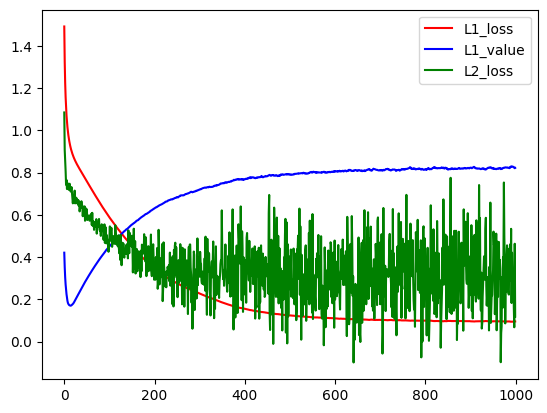

In [23]:
%matplotlib inline
plt.plot(L1_losses,'r',label='L1_loss')
plt.plot(L1_values,'b',label='L1_value')
plt.plot(L2_losses,'g',label='L2_loss')
plt.legend()

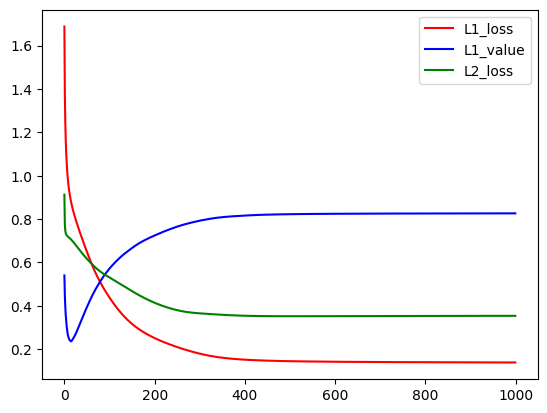

In [17]:
%matplotlib inline
plt.plot(L1_losses,'r',label='L1_loss')
plt.plot(L1_values,'b',label='L1_value')
plt.plot(L2_losses,'g',label='L2_loss')
plt.legend()

In [77]:
grad_modifier.Normlization_Term_2(params,x)

tensor(0.1821, device='cuda:0', grad_fn=<DivBackward0>)

In [34]:
# the goal about achieve zero loss is depended on the Batch size and the number of data
##############################################################################################################
%matplotlib inline
from mltool.visualization import *
from tqdm.notebook import tqdm
B=20
I=10
O=30
class MyModel(torch.nn.Module):
    def __init__(self, in_chan, out_chan):
        super().__init__()
        self.backbone = torch.nn.Linear(in_chan, out_chan,bias=False)
    def forward(self,x):
        return self.backbone(x)**2
model= MyModel(I, O).cuda()
x    = torch.randn(B, I).cuda()
y    = torch.randn(B, O).cuda()
func_model, params = make_functional(model)
optimizer = torch.optim.SGD(model.parameters(),1)

#optimizer = SGD_Nodel(model.parameters(),1)
#optimzer= torch.optim.Adam(model.parameters())

accues= []
grad_modifier = Nodal_GradientModifier(0,0.001,1000)
#weight_beg = model.backbone.weight.cpu().detach().numpy()
for _ in tqdm(range(10)):
    optimizer.zero_grad()
    # loss = F.mse_loss(model(x),y)
    # loss.backward()
    #gradient = model.backbone.weight.grad.cpu().detach().numpy()
    accu=grad_modifier.backward(model,x,y,return_Normlization_Term_2=True)
    optimizer.step()
    accues.append(accu.item())
#weight_end = model.backbone.weight.cpu().detach().numpy()

plt.plot(accues)

  0%|          | 0/10 [00:00<?, ?it/s]


KeyboardInterrupt



In [8]:
import numpy as np

In [52]:
print(np.linalg.norm(weight_end - weight_beg))

1.6432467


In [12]:
print(optimzer.param_groups[0]['params'][0].grad)

In [3]:
cotangents = torch.ones(*shape).cuda()
cotangents_variable  = torch.randint(2,shape).cuda()*2-1
cotangents_variables = torch.randint(2,(10,*shape)).cuda()*2-1

In [4]:
Normlization_Term_1 = lambda params,x:((functorch.jvp(lambda x:func_model(params,x), (x,), (cotangents,)
                                      )[1]-1)**2).mean()
with torch.no_grad():
    Derivation_Term_1 = jacrev(Normlization_Term_1, argnums=0)(params, x)
    torch.cuda.empty_cache()

$$
\sum_\gamma A_{\gamma\gamma}^2=2(||A||_F^2) - Var[Tr_m(A)]=2\{E[Tr_m(AA^T)] - Var[Tr_m(A)]\}
$$
where $A=J(\mathbf{1}-I)J^T$

$$
||A||_F^2= Tr(AA^T)=E[< \vec{v}A|A^T\vec{v}>]
$$

$$
< \vec{v}A| = < \vec{v}J|(\mathbf{1}-I)J^T|= < \vec{u}J^T|=|J\vec{u}>^T
$$

In [5]:
def TrvJOJv_and_ETrAAT(params,x,cotangents_variable):
    _, vJ_fn = functorch.vjp(lambda x:func_model(params,x), x)
    vJ   = vJ_fn(cotangents_variable)[0]
    dims = list(range(1,len(vJ.shape)))
    vJO  = vJ.sum(dims,keepdims=True)-vJ # <vJ|1-I|
    vJOJv= (vJ*vJO).sum(dims)#should sum over all dimension except batch
    return vJOJv, functorch.jvp(lambda x:func_model(params,x), (x,), (vJO,))[1].norm()# average the batch_size also
def get_TrvJOJv(params,x,cotangents_variable):
    _, vJ_fn = functorch.vjp(lambda x:func_model(params,x), x)
    vJ   = vJ_fn(cotangents_variable)[0]
    vJO  = vJ.sum(1,keepdims=True)-vJ # <vJ|1-I|
    vJOJv= (vJ*vJO).sum(-1)#should sum over all dimension except batch
    return vJOJv
def get_ETrAAT(params,x,cotangents_variable):
    _, vJ_fn = functorch.vjp(lambda x:func_model(params,x), x)
    vJ   = vJ_fn(cotangents_variable)[0]
    vJO  = vJ.sum(1,keepdims=True)-vJ # <vJ|1-I|
    return functorch.jvp(lambda x:func_model(params,x), (x,), (vJO,))[1].norm()# average the batch_size also
def get_ETrAAT_times(params,x,cotangents_variables):
    return vmap(get_ETrAAT, (None, None, 0 ))(params, x,cotangents_variables).mean()
def get_TrvJOJv_times(params,x,cotangents_variables):
    return vmap(get_TrvJOJv, (None, None, 0 ))(params, x,cotangents_variables).mean()
def Normlization_Term_2(params,x,cotangents_variables):
    TrvJOJvs,ETrAATs =  vmap(TrvJOJv_and_ETrAAT, (None, None, 0 ))(params, x,cotangents_variables)
    return ETrAATs.mean() - torch.var(TrvJOJvs,0).mean()
def Normlization_Term_2_Full(params,x):
    return (((vmap(jacrev(func_model, argnums=1), (None, 0))(params, x)**2).sum(-1)-1)**2).mean()

In [6]:
with torch.no_grad():
    Derivation_Term_2 = jacrev(Normlization_Term_2, argnums=0)(params, x,cotangents_variables)

In [8]:
params_from_optimizer = optimizer.param_groups[0]['params']

In [14]:
for i,(p1,p2) in enumerate(zip(params_from_optimizer,params)):
    if not torch.allclose(p1,p2):
        print(f"{i:03d}:p1.shape={p1.shape}:p2.shape={p2.shape}")

In [9]:
len(params)

132

In [65]:
# from tqdm.notebook import tqdm
# torch.cuda.empty_cache()
# Derivation_Term_2=[0]*len(params)
# with torch.no_grad():
#     for i in tqdm(range(32)):
#         for j in tqdm(range(64)):
#             small_fun = lambda params,x:func_model(params,x)[:,i,j]
#             Normlization_Term_2= lambda params,x:((
#                 (vmap(jacrev(small_fun, argnums=1), (None, 0))(params, x)**2).sum(-1)-1
#                 )**2).mean()
#             Derivation_Term_2_tuple = jacrev(Normlization_Term_2, argnums=0)(params, x)
#             for k in range(len(Derivation_Term_2_tuple)):
#                 Derivation_Term_2[k]+=Derivation_Term_2_tuple[k]
            

输入 70x32x32 过大, 我们做出近邻假设:
```
                                     (x-h,y-h) (x  ,y-h) (x+h,y-h)
位于 (x,y) 的 pixel 的响应只和他周围 一圈 (x-h,y  ) (x ,y  ) (x+h,y)
                                     (x-h,y+h) (x  ,y+h) (x+h,y+h)
有关
```

###### Define the optimizer

In [ ]:
from collections import defaultdict
import math
from typing import cast, List, Optional, Dict, Tuple

import torch
from torch import Tensor
from .optimizer import Optimizer, _use_grad_for_differentiable

__all__ = ['Adam', 'adam']

class Adam_Nodal(Optimizer):
    def __init__(self, params, lambda1=100,lambda2=100,sample_times=10,lr=1e-3, betas=(0.9, 0.999), eps=1e-8,
                 weight_decay=0, amsgrad=False, *, foreach: Optional[bool] = None,
                 maximize: bool = False, capturable: bool = False,
                 differentiable: bool = False, fused: bool = False):
        assert func_model is not None,"you need provide the function-like model. For example, try `func_model, params = make_functional(model)` "
        if not 0.0 <= lr:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError("Invalid beta parameter at index 0: {}".format(betas[0]))
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError("Invalid beta parameter at index 1: {}".format(betas[1]))
        if not 0.0 <= weight_decay:
            raise ValueError("Invalid weight_decay value: {}".format(weight_decay))
        defaults = dict(lr=lr, betas=betas, eps=eps,
                        weight_decay=weight_decay, amsgrad=amsgrad,
                        maximize=maximize, foreach=foreach, capturable=capturable,
                        differentiable=differentiable, fused=fused)
        super(Adam, self).__init__(params, defaults)a
        assert len(self.param_groups)==1, "only one group parameter allowed "
        self.params = optimizer.param_groups[0]['params']
        self.func_model = func_model
        if fused:
            if differentiable:
                raise RuntimeError("`fused` cannot be `differentiable`")
            self._step_supports_amp_scaling = True
            # TODO(crcrpar): [low prec params & their higher prec copy]
            # Suppor AMP with FP16/BF16 model params which would need
            # higher prec copy of params to do update math in higher prec to
            # alleviate the loss of information.
            if not all(
                p.is_cuda and torch.is_floating_point(p)
                for pg in self.param_groups for p in pg['params']
            ):
                raise RuntimeError("FusedAdam requires all the params to be CUDA, floating point")
                self.lambda1 = lambda1
        self.lambda2 = lambda2
        self.sample_times = sample_times
        self.cotangents_sum_along_x_dimension = None
        
    def __setstate__(self, state):
        super().__setstate__(state)
        for group in self.param_groups:
            group.setdefault('amsgrad', False)
            group.setdefault('maximize', False)
            group.setdefault('foreach', None)
            group.setdefault('capturable', False)
            group.setdefault('differentiable', False)
            group.setdefault('fused', False)
        state_values = list(self.state.values())
        step_is_tensor = (len(state_values) != 0) and torch.is_tensor(state_values[0]['step'])
        if not step_is_tensor:
            for s in state_values:
                s['step'] = torch.tensor(float(s['step']))

                
    def Normlization_Term_1(self,params,x):
        if self.cotangents_sum_along_x_dimension is None or self.cotangents_sum_along_x_dimension.shape!=x.shape:
            self.cotangents_sum_along_x_dimension = torch.ones_like(x)
        return ((functorch.jvp(lambda x:self.func_model(params,x), (x,), (self.cotangents_sum_along_x_dimension,))[1]-1)**2).mean()
    def TrvJOJv_and_ETrAAT(self,params,x,cotangents_variable):
        _, vJ_fn = functorch.vjp(lambda x:self.func_model(params,x), x)
        vJ   = vJ_fn(cotangents_variable)[0]
        dims = list(range(1,len(vJ.shape)))
        vJO  = vJ.sum(dims,keepdims=True)-vJ # <vJ|1-I|
        vJOJv= (vJ*vJO).sum(dims)#should sum over all dimension except batch
        return vJOJv, functorch.jvp(lambda x:self.func_model(params,x), (x,), (vJO,))[1].norm()# average the batch_size also
    def get_TrvJOJv(self,params,x,cotangents_variable):
        _, vJ_fn = functorch.vjp(lambda x:self.func_model(params,x), x)
        vJ   = vJ_fn(cotangents_variable)[0]
        vJO  = vJ.sum(1,keepdims=True)-vJ # <vJ|1-I|
        vJOJv= (vJ*vJO).sum(-1)#should sum over all dimension except batch
        return vJOJv
    def get_ETrAAT(self,params,x,cotangents_variable):
        _, vJ_fn = functorch.vjp(lambda x:self.func_model(params,x), x)
        vJ   = vJ_fn(cotangents_variable)[0]
        vJO  = vJ.sum(1,keepdims=True)-vJ # <vJ|1-I|
        return functorch.jvp(lambda x:self.func_model(params,x), (x,), (vJO,))[1].norm()# average the batch_size also
    def get_ETrAAT_times(self,params,x,cotangents_variables):
        return vmap(get_ETrAAT, (None, None, 0 ))(params, x,cotangents_variables).mean()
    def get_TrvJOJv_times(self,params,x,cotangents_variables):
        return vmap(self.get_TrvJOJv, (None, None, 0 ))(params, x,cotangents_variables).mean()
    def Normlization_Term_2(self,params,x,cotangents_variables):
        TrvJOJvs,ETrAATs =  vmap(self.TrvJOJv_and_ETrAAT, (None, None, 0 ))(params, x,cotangents_variables)
        return ETrAATs.mean() - torch.var(TrvJOJvs,0).mean()
    def Normlization_Term_2_Full(model, params,x):
        return (((vmap(jacrev(self.func_model, argnums=1), (None, 0))(params, x)**2).sum(-1)-1)**2).mean()   
    
            
    @_use_grad_for_differentiable
    def step(self, _input,_output, model):
        """Performs a single optimization step.

        Args:
            closure (Callable, optional): A closure that reevaluates the model
                and returns the loss.
            grad_scaler (:class:`torch.cuda.amp.GradScaler`, optional): A GradScaler which is
                supplied from ``grad_scaler.step(optimizer)``.
        """
        self._cuda_graph_capture_health_check()

        # we will firstly update the grad from regularzation term
        # in this case is 
        #     $L1 = \sum_\gamma(\sum_\alpha J_\alpha^{\gamma}-1)^2$
        #     $L2 = \lambda_2[\sum_\gamma A_{\gamma\gamma}^2]$ where $A=J(\mathbf{1}-I)J^T$
        #          for L2 part, we will use Hutchinson Method to estimate the value and do backprogation
        #          $\sum_\gamma A_{\gamma\gamma}^2 = 2\{E[\Tr_m(AA^T)] - Var[\Tr_m(A)]\}$
        
        self.func_model, params =  make_functional(model)
        shape = _output.shape
        cotangents_variables = torch.randint(2,(self.sample_times,*shape)).cuda()*2-1
        with torch.no_grad():
            Derivation_Term_1 = jacrev(self.Normlization_Term_1, argnums=0)(params, _input)
            Derivation_Term_2 = jacrev(self.Normlization_Term_2, argnums=0)(params, _input,cotangents_variables)

        for group in self.param_groups:
            params_with_grad = []
            grads = []
            exp_avgs = []
            exp_avg_sqs = []
            max_exp_avg_sqs = []
            state_steps = []
            beta1, beta2 = group['betas']

            grad_scale = None
            found_inf = None
            if group['fused'] and grad_scaler is not None:
                grad_scale = grad_scaler._get_scale_async()
                device = grad_scale.device
                grad_scale = _MultiDeviceReplicator(grad_scale)
                found_inf = _get_fp16AMP_params(optimizer=self, grad_scaler=grad_scaler, device=device)

            for p ,d1,d2 in zip(group['params'],Derivation_Term_1,Derivation_Term_2):
                if p.grad is not None:
                    params_with_grad.append(p)
                    if p.grad.is_sparse:
                        raise RuntimeError('Adam does not support sparse gradients, please consider SparseAdam instead')
                    grads.append(p.grad+d1+d2)

                    state = self.state[p]
                    # Lazy state initialization
                    if len(state) == 0:
                        state['step'] = (
                            torch.zeros((1,), dtype=torch.float, device=p.device)
                            if self.defaults['capturable'] or self.defaults['fused']
                            else torch.tensor(0.)
                        )
                        # Exponential moving average of gradient values
                        state['exp_avg'] = torch.zeros_like(p, memory_format=torch.preserve_format)
                        # Exponential moving average of squared gradient values
                        state['exp_avg_sq'] = torch.zeros_like(p, memory_format=torch.preserve_format)
                        if group['amsgrad']:
                            # Maintains max of all exp. moving avg. of sq. grad. values
                            state['max_exp_avg_sq'] = torch.zeros_like(p, memory_format=torch.preserve_format)

                    exp_avgs.append(state['exp_avg'])
                    exp_avg_sqs.append(state['exp_avg_sq'])

                    if group['amsgrad']:
                        max_exp_avg_sqs.append(state['max_exp_avg_sq'])
                    if group['differentiable'] and state['step'].requires_grad:
                        raise RuntimeError('`requires_grad` is not supported for `step` in differentiable mode')
                    state_steps.append(state['step'])

            adam(params_with_grad,
                 grads,
                 exp_avgs,
                 exp_avg_sqs,
                 max_exp_avg_sqs,
                 state_steps,
                 amsgrad=group['amsgrad'],
                 beta1=beta1,
                 beta2=beta2,
                 lr=group['lr'],
                 weight_decay=group['weight_decay'],
                 eps=group['eps'],
                 maximize=group['maximize'],
                 foreach=group['foreach'],
                 capturable=group['capturable'],
                 differentiable=group['differentiable'],
                 fused=group['fused'],
                 grad_scale=grad_scale,
                 found_inf=found_inf)

        return loss



#### 如果我们直接计算出来梯度, 是不是可以减少中间变量的占用

我们接下来要利用的内置函数 vpj, vjp, pjv 实现的是这几个量
- $\sum_\alpha J_\alpha^\gamma$
- $\sum_\alpha H_{\alpha\beta}^\gamma$
- $\sum_\alpha (J_\alpha^\gamma)^2$
- $\sum_\alpha J_\alpha^\gamma H_{\alpha\beta}^\gamma$


##### $\sum_\alpha J_\alpha^\gamma$

In [200]:
jvp_from_batch_J = batch_J.sum(-1)

首先比较 torch 原生的和functorch 的 jvp function

In [195]:
output_pytorch_jvp,jvp_result_pytorch_jvp = torch.autograd.functional.jvp(model, x, torch.ones(7,3))
output_functorch_jvp,jvp_result_functorch_jvp = functorch.jvp(model, (x,), (torch.ones(7,3),))

In [202]:
# result 
print(torch.dist(output_pytorch_jvp,output_functorch_jvp))
print(torch.dist(jvp_result_pytorch_jvp,jvp_result_functorch_jvp))
print(torch.dist(jvp_result_pytorch_jvp,jvp_from_batch_J))

tensor(0., grad_fn=<DistBackward0>)
tensor(0., grad_fn=<DistBackward0>)
tensor(3.4459e-07, grad_fn=<DistBackward0>)


注意到上面的function 没有实现 vmap, 我们现在来尝试用vmap写出

In [206]:
func = lambda x:functorch.jvp(model, (x,), (torch.ones(3),))

In [208]:
output_batch_functorch_jvp,jvp_batch_result_functorch_jvp = vmap(func)(x)

In [211]:
print(torch.dist(output_batch_functorch_jvp,output_pytorch_jvp))
print(torch.dist(jvp_batch_result_functorch_jvp,jvp_from_batch_J))

tensor(4.5825e-07, grad_fn=<DistBackward0>)
tensor(3.3542e-07, grad_fn=<DistBackward0>)


下面进行压力测试

In [222]:
B=200
I=100
O=300
model= MyModel(I, O)
x    = torch.randn(B, I)

In [223]:
%%timeit
output_pytorch_jvp,jvp_result_pytorch_jvp = torch.autograd.functional.jvp(model, x, torch.ones(B,I))

450 µs ± 28.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [224]:
%%timeit
output_pytorch_jvp,jvp_result_pytorch_jvp = functorch.jvp(model, (x,), (torch.ones(B,I),))

464 µs ± 25.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [226]:
func = lambda x:functorch.jvp(model, (x,), (torch.ones(I),))

In [227]:
%%timeit
output_batch_functorch_jvp,jvp_batch_result_functorch_jvp = vmap(func)(x)

685 µs ± 40.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


结论: 不用 vmap 会更加好!

#####  $\sum_\alpha H_{\alpha\beta}^\gamma = \partial_{\beta}\sum_\alpha J^\gamma_{\alpha}$

In [269]:
import torch
from functorch import make_functional, vmap, grad
model= MyModel(3, 4)
x    = torch.randn(7, 3)
func_model, params = make_functional(model)
w    = params[0]
batch_J= vmap(jacrev(func_model, argnums=1), (None, 0))(params, x)
batch_H= jacrev(vmap(jacrev(func_model, argnums=1), (None, 0)), argnums=0)(params, x)

In [270]:
batch_H[0].shape# 后面的 (4,3) 是 weight 的形状, 7 是 batch, 4 是输出的Dim, 3是alpha 

torch.Size([7, 4, 3, 4, 3])

指标 $\beta$ 是指代的第几个 parameter, 也就是 `batch_H` 这个 tuple 里面的第几个量

In [280]:
func = lambda params,x:functorch.jvp(lambda x:func_model(params,x), (x,), (torch.ones(7,3),))[1]
batch_H_sum_from_jvp= jacrev(func, argnums=0)(params, x)
#### full computation
batch_H= jacrev(vmap(jacrev(func_model, argnums=1), (None, 0)), argnums=0)(params, x)
jvp_from_batch_H = batch_H[0].sum(2)
torch.dist(batch_H[0].sum(2),batch_H_sum_from_jvp[0])

tensor(1.2781e-06, grad_fn=<DistBackward0>)

In [ ]:
##### 

In [ ]:
_, vjp_fn = vjp(func_model, x)

ft_jacobian, = vmap(vjp_fn)(unit_vectors)

In [152]:
batch_J= vmap(func, ((None, 0), (None,None)) 
             )( (params, x), (torch.ones(4),torch.ones(3)))

RuntimeError: jvp(f, primals, tangents): Expected primals and tangents to have the same python structure. For example, if primals is a tuple of 3 tensors, tangents also must be. Got primals with structure TreeSpec(tuple, None, [TreeSpec(tuple, None, [*]), *]) and tangents with structure TreeSpec(tuple, None, [*, *])

In [ ]:
_, vjp_fn = vjp(partial(predict, weight, bias), x)

ft_jacobian, = vmap(vjp_fn)(unit_vectors)

In [145]:
from functorch import jvp
x = torch.randn(5)
y = torch.randn(5)
f = lambda x, y: (x * y)
_, output = jvp(f, (x, y), (torch.ones(5), torch.ones(5)))

In [146]:
output

tensor([ 3.1409, -0.3539, -0.2227, -0.5354, -2.3300])

# Trace in Fourcast mode

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
import torch.nn as nn
from model.GradientModifier import *
import time

In [3]:
from model.afnonet import AFNONet
from einops.layers.torch import Rearrange
model = AFNONet((32,64),2,70,70)
model=model.cuda()
a = torch.randn(4,70,32,64).cuda()
y = model(a)

In [9]:
class Nodal_GradientModifier:
    def __init__(self, lambda1=1, lambda2=1, sample_times=100, do_unit_renormalize=False,L1_level=1,L2_level=1):
        self.lambda1 = lambda1
        self.lambda2 = lambda2
        self.sample_times = sample_times 
        self.cotangents_sum_along_x_dimension = None
        self.do_unit_renormalize = do_unit_renormalize
        self.L1_level = L1_level
        self.L2_level = L2_level
    def Normlization_Term_1(self, params, x, return_abs_value=False):
        if self.cotangents_sum_along_x_dimension is None or self.cotangents_sum_along_x_dimension.shape != x.shape:
            self.cotangents_sum_along_x_dimension = torch.ones_like(x)
        tvalues= functorch.jvp(lambda x: self.func_model(params, x),
                  (x,), (self.cotangents_sum_along_x_dimension,))[1]
        values = ((tvalues-1)**2).mean()
        #(B, Outputdim) -> (1,)
        N = np.prod(x.shape[1:])
        if self.do_unit_renormalize:
            # the varation of L1 for iid normal distribution is around 2n^2 + 4n
            coef   = 2*np.power(N, 2) + 4*N
            values = values/np.sqrt(coef)
        if return_abs_value:
            return values, tvalues.abs().mean()
        return values
        
    def TrvJOJv_and_ETrAAT(self,params,x,cotangents_variable):
        # compute projection on vector `cotangent` only once.
        _, vJ_fn = functorch.vjp(lambda x:self.func_model(params,x), x)
        vJ   = vJ_fn(cotangents_variable)[0]
        dims = list(range(1,len(vJ.shape)))
        vJO  = vJ.sum(dims,keepdims=True)-vJ # <vJ|1-I|
        vJOJv= (vJO*vJ).sum(dim=dims)# <vJ|1-I|Jv> #should sum over all dimension except batch
        #vJOJv= vJOJv/np.sqrt(torch.prod(self.output_shape).item())
        ETrAAT = functorch.jvp(lambda x:self.func_model(params,x), (x,), (vJO,))[1] # (B,Ouputdim)
        # <vJ|1-I|J^T | J|1-I|J^Tv> = < k| J^T | J |k> where the  <k| = <vJ|
        # the `ETrAAT` now is just the < k| J^T |
        dims = list(range(1,len(ETrAAT.shape)))
        ETrAAT=torch.sum(ETrAAT**2,dim=dims)
        # the `ETrAAT` now is just the < k| J^T | J |k> 
        return vJOJv, ETrAAT# DO NOT average the batch_size also
    def get_TrvJOJv(self,params,x,cotangents_variable):
        _, vJ_fn = functorch.vjp(lambda x:self.func_model(params,x), x)
        vJ   = vJ_fn(cotangents_variable)[0]
        dims = list(range(1,len(vJ.shape)))
        vJO  = vJ.sum(1,keepdims=True)-vJ # <vJ|1-I|
        vJOJv= (vJO*vJ).sum(dim=dims)#should sum over all dimension except batch
        #vJOJv= vJOJv/np.sqrt(torch.prod(self.output_shape).item()) # notice we will do var later, so should get sqrt
        return vJOJv
    def get_ETrAAT(self,params,x,cotangents_variable):
        _, vJ_fn = functorch.vjp(lambda x:self.func_model(params,x), x)
        vJ   = vJ_fn(cotangents_variable)[0]
        vJO  = vJ.sum(1,keepdims=True)-vJ # <vJ|1-I|
        ETrAAT = functorch.jvp(lambda x:self.func_model(params,x), (x,), (vJO,))[1] # (B,Ouputdim)
        dims = list(range(1,len(ETrAAT.shape)))# (B,Ouputdim)
        ETrAAT=torch.sum(ETrAAT**2,dim=dims)# (B,Ouputdim) 
        return ETrAAT
    def get_ETrAAT_times(self,params,x,cotangents_variables):
        return vmap(self.get_ETrAAT, (None, None, 0 ))(params, x,cotangents_variables).mean()
    def get_TrvJOJv_times(self,params,x,cotangents_variables):
        return vmap(self.get_TrvJOJv, (None, None, 0 ))(params, x,cotangents_variables).mean()
    
    def Estimate_L2_once(self,params,x,cotangents1,cotangents2,cotangents3):
        """$L2 =\sum_\gamma [\sum_\alpha (J_\alpha^{\gamma})^2-1]^2=||L_{k}^{\gamma}||^2- 2 ||J||_2^2$
        Notice the ture L2 need a shift vaule equal to outshape
        ----------------------------------------
        import torch
        from mltool.visualization import *
        N = 10
        J = torch.randn(N,N)
        L = torch.einsum("ba,bc->bac",J,J).flatten(1,2)

        esitmates=[]
        for B in [1e2,1e3,1e4,1e5,1e6]:
            for _ in range(10):
                #a = torch.randint(0,2,size=(int(B),N))*2-1.0# <-- support [-1,1] or any random number 
                #b = torch.randint(0,2,size=(int(B),N))*2-1.0# <-- support [-1,1] or any random number 
                a = torch.randn(int(B),N)
                b = torch.randn(int(B),N)
                c = torch.randn(int(B),N)
                v1= torch.einsum('ij,bj->bi',J,a)
                v2= torch.einsum('ij,bj->bi',J,b)
                v = v1*v2
                v3= torch.einsum('ij,bi->bj',J,c)
                esitmates.append(torch.mean(v.norm(dim=1)**2) - 2*torch.mean(v3.norm(dim=1)**2))
        real_val = L.norm()**2- 2*J.norm()**2
        xrange = list(range(len(esitmates)))
        plt.plot(xrange, [real_val]*len(esitmates),'g')
        plt.plot(xrange, esitmates,'r')
        """
        # in order to avoid large value, we will divide len(output_shape)
        # this equal to make the offset value in L2 become 1
        vL1 = functorch.jvp(lambda x:self.func_model(params,x), (x,), (cotangents1,))[1] #(B, output_size)
        vL2 = functorch.jvp(lambda x:self.func_model(params,x), (x,), (cotangents2,))[1] #(B, output_size)
        dims = list(range(1,len(vL1.shape)))
        coef = np.sqrt(np.prod(vL1.shape[1:]))
        vL   = ((vL1/coef*vL2)**2).sum(dim=dims)
        vJ  = functorch.jvp(lambda x:self.func_model(params,x), (x,), (cotangents3,))[1] #(B, output_size)
        vJ   = ((vJ/coef)**2).sum(dim=dims)**2
        esitimate = vL - 2*vJ + 1 #(B, 1)
        return esitimate

    def inference(self,model,x,y, strict=True,return_abs_value=True):
        back_to_train_mode = model.training
        model.eval()
        buffers=[]
        if not strict:buffers = list(model.buffers())
        if len(buffers) > 0:
            func_model,params, buffer = make_functional_with_buffers(model, disable_autograd_tracking=True)
            self.func_model = lambda params, x: func_model(params, buffer, x)
        else:
            self.func_model, params = make_functional(model,disable_autograd_tracking=True)
        #self.func_model, params = make_functional(model,disable_autograd_tracking=True)
        self.output_shape = y.shape
        #with torch.no_grad():  # may occur unknow error when using make ---> RuntimeError: Mask should be Bool Scalar TypeFloat
        L11=L12=-1
        if self.lambda1 != 0:
            if return_abs_value:
                L11,L12=self.Normlization_Term_1(params, x,return_abs_value)
                L11=L11.item()
                L12=L12.item()
            else:
                L11=self.Normlization_Term_1(params, x,return_abs_value).item()
        
        L2=self.Normlization_Term_2(params, x).item() if self.lambda2 != 0 else -1
        if back_to_train_mode:model.train()
        return L11,L12,L2
        
    def backward(self,model, x, y, strict=True):
        
        model.eval()
        buffers=[]
        if not strict:buffers = list(model.buffers())
        if len(buffers) > 0:
            func_model,params, buffer = make_functional_with_buffers(model, disable_autograd_tracking=True)
            self.func_model = lambda params, x: func_model(params, buffer, x)
        else:
            self.func_model, params = make_functional(model,disable_autograd_tracking=True)

        self.output_shape       = y.shape[1:]
        with torch.no_grad():
            if self.lambda1 != 0:
                Derivation_Term_1 = jacrev(self.Normlization_Term_1, argnums=0)(params, x)
            if self.lambda2 != 0:
                Derivation_Term_2 = jacrev(self.Normlization_Term_2, argnums=0)(params, x)
        model.train()
        for i, param in enumerate(model.parameters()):
            delta_p = 0
            if self.lambda1 != 0:delta_p += self.lambda1*Derivation_Term_1[i]
            if self.lambda2 != 0:delta_p += self.lambda2*Derivation_Term_2[i]
            if param.grad is not None:
                param.grad.data += delta_p
            else:
                param.grad = delta_p

In [10]:
class NGmod_estimate_L2(Nodal_GradientModifier):
    def Normlization_Term_2(self,params,x):
        cotangents1s = torch.randint(0,2, (self.sample_times,*x.shape)).cuda()*2-1.0
        cotangents2s = torch.randint(0,2, (self.sample_times,*x.shape)).cuda()*2-1.0
        cotangents3s = torch.randint(0,2, (self.sample_times,*x.shape)).cuda()*2-1.0
        values = vmap(self.Estimate_L2_once, (None,None, 0,0,0))(params,x,cotangents1s,cotangents2s,cotangents3s).mean(0)
        values = values.mean()
        return values

In [7]:
grad_modifier = NGmod_estimate_L2(1,0.1,18)
grad_modifier.func_model, params = make_functional(model,disable_autograd_tracking=True)

In [8]:
torch.cuda.empty_cache()

In [2]:
import torch

In [3]:
loss_scaler     = torch.cuda.amp.GradScaler(enabled=True)

In [ ]:
loss_scaler.u

In [9]:
with torch.cuda.amp.autocast():
    grad_modifier.backward(model,a,y)

In [39]:
func_model = lambda x:model(x)[:,[39,48]]

In [40]:
def the_Nodal_L1_meassure(func):
    @wraps(func)
    def wrapper_fn(x):
        cotangents_sum_along_x_dimension = torch.ones_like(x)
        tvalues= functorch.jvp(func,(x,), (cotangents_sum_along_x_dimension,))[1]
        return tvalues
    return wrapper_fn

In [7]:
with torch.no_grad():
    L1meassure = vmap(the_Nodal_L1_meassure(func_model), (0))(a.unsqueeze(1))

In [9]:
with torch.no_grad():
    L2meassure = vmap(the_Nodal_L2_meassure(func_model,chunk_size=1024), (0))(a.unsqueeze(1))

In [23]:
L2meassure.shape

torch.Size([1, 1, 32, 64])

In [211]:
#L2measurer=Nodal2_measure(a.device,None)

In [6]:
now=time.time()
L2meassure = vmap(the_Nodal_L2_meassure(func_model, argnums=1,chunk_size=1024), (None, 0))(params, a.unsqueeze(1))
print(time.time()-now)
#torch.cuda.empty_cache()
print(time.time()-now)

NameError: name 'the_Nodal_L2_meassure' is not defined

In [21]:
from scipy.sparse import identity
import sparse
import torch
from functorch._src.eager_transforms import *
from functorch._src.eager_transforms import _vjp_with_argnums,_construct_standard_basis_for,_slice_argnums,_safe_zero_index
def create_sparse_identity(flat_output, flat_output_numels):
    assert isinstance(flat_output_numels,int)
    assert isinstance(flat_output,(tuple,list))
    coo= sparse.COO.from_scipy_sparse(identity(flat_output_numels))
    coo= coo.reshape([flat_output_numels]+list(flat_output))
#     values  = coo.data
#     indices = coo.coords
#     i = torch.LongTensor(indices)
#     v = torch.FloatTensor(values)
#     shape = coo.shape
#     tensor= torch.sparse.FloatTensor(i, v, torch.Size(shape))
    return coo
def _construct_sparse_basis_for(flat_output, flat_output_numels):
    return [create_sparse_identity(t.shape,s) for t,s in zip(flat_output,flat_output_numels)]
def convert_to_torch_sparse(coo,device='cpu'):
    values  = coo.data
    indices = coo.coords
    i = torch.LongTensor(indices).to(device)
    v = torch.FloatTensor(values).to(device)
    shape = coo.shape
    return torch.sparse.FloatTensor(i, v, torch.Size(shape))
def convert_to_torch(coo): 
    return torch.FloatTensor(coo.todense())

class Nodal2_measure:
    def __init__(self,device,chunk_size=None):
        self.device     = device
        self.chunk_size = chunk_size
        self.basis_this_chunk_sparse = None
    def __call__(self,func: Callable, argnums: Union[int, Tuple[int]] = 0):
        @wraps(func)
        def wrapper_fn(*args):
            chunk_size=self.chunk_size
            has_aux = False
            vjp_out = _vjp_with_argnums(func,*args, argnums=1, has_aux=has_aux)
            output, vjp_fn = vjp_out
            flat_output, output_spec = tree_flatten(output)
            assert len(flat_output) == 1
            flat_output_numels = tuple(out.numel() for out in flat_output)
            
            sum_axis = list(range(1,len(output.shape)))
            sum_axis.reverse()
            sum_axis = [-t for t in sum_axis]
            
            #device= flat_output[0].device
            now = time.time()
            if self.basis_this_chunk_sparse is None:
                basis = _construct_sparse_basis_for(flat_output, flat_output_numels)[0]
                if chunk_size is None:
                    self.basis_this_chunk_sparse = convert_to_torch_sparse(basis,device=self.device)
                else:
                    start  = 0
                    self.basis_this_chunk_sparse={}
                    while start < len(basis):
                        end = min(start+chunk_size, len(basis))
                        self.basis_this_chunk_sparse[start,end] = convert_to_torch_sparse(basis[start:end],device=device)
                        start = end 
            print(f"create basis cost {time.time()-now}");now = time.time()
            if chunk_size is None:
                basis_this_chunk = self.basis_this_chunk_sparse.to_dense()
                print(f"sparse to dense cost {time.time()-now}");now = time.time()
                results = torch.sum((vmap(vjp_fn)(basis_this_chunk))**2,sum_axis)
                print(f"computing cost {time.time()-now}");now = time.time()
            else:
                results= None
                start  = 0
                while start < len(basis):
                    end = min(start+chunk_size, len(basis))
                    basis_this_chunk = self.basis_this_chunk_sparse[start,end].to_dense()
                    if results is None:
                        results = torch.sum(vmap(vjp_fn)(basis_this_chunk)**2,sum_axis)
                    else:
                        results = torch.cat([results,torch.sum(vmap(vjp_fn)(basis_this_chunk)**2,sum_axis)])
                    start = end
            return results
        return wrapper_fn
        

def the_Nodal_L2_meassure(func: Callable, argnums: Union[int, Tuple[int]] = 0, *, has_aux=False, chunk_size=None,sum_axis=[-3,-2,-1]):
    @wraps(func)
    def wrapper_fn(*args):
        has_aux = False
        vjp_out = _vjp_with_argnums(func,*args, argnums=argnums, has_aux=has_aux)
        output, vjp_fn = vjp_out
        flat_output, output_spec = tree_flatten(output)
        assert len(flat_output) == 1
        flat_output_numels = tuple(out.numel() for out in flat_output)
        device= flat_output[0].device
        basis = _construct_sparse_basis_for(flat_output, flat_output_numels)[0]
        if chunk_size is None:
            basis_this_chunk = convert_to_torch_sparse(basis,device=device).to_dense()
            results = torch.sum((vmap(vjp_fn)(basis_this_chunk))**2,sum_axis)
        else:
            results= None
            start  = 0
            while start < len(basis):
                end = min(start+chunk_size, len(basis))
                #print(f"{start:4d} to {end:4d}")
                basis_this_chunk = convert_to_torch_sparse(basis[start:end],device=device).to_dense()
                #print("0")
                if results is None:
                    results = torch.sum(vmap(vjp_fn)(basis_this_chunk)**2,sum_axis)
                    #print("1")
                else:
                    results = torch.cat([results,torch.sum(vmap(vjp_fn)(basis_this_chunk)**2,sum_axis)])
                    #print("2")
                start = end
                #torch.cuda.empty_cache()
        #print(f"result_cost:{time.time()-now}");now = time.time()
        return results.reshape(flat_output[0].shape)
        
    return wrapper_fn

In [2]:
def myjacrev(func: Callable, argnums: Union[int, Tuple[int]] = 0, *, has_aux=False, bucket=None):
    @wraps(func)
    def wrapper_fn(*args):
        vjp_out = _vjp_with_argnums(func, *args, argnums=argnums, has_aux=has_aux)
        if has_aux:
            output, vjp_fn, aux = vjp_out
        else:
            output, vjp_fn = vjp_out

        # See NOTE: [Computing jacobian with vmap and vjp for multiple outputs]
        flat_output, output_spec = tree_flatten(output)
        # NB: vjp already checks that all outputs are tensors
        # Step 1: Construct grad_outputs by splitting the standard basis
        flat_output_numels = tuple(out.numel() for out in flat_output)
        print(flat_output[0].shape)
        print(flat_output_numels)
        flat_basis = _construct_standard_basis_for(flat_output, flat_output_numels)
        print(flat_basis[0].shape)
        basis = tree_unflatten(flat_basis, output_spec)
        print(basis.shape)
        raise
        results=None
        if bucket is not None:
            basis = torch.split(basis,bucket)
            for b in basis:
                if results is None:
                    results = vmap(vjp_fn)(b)
                else:
                    results = torch.cat([results,vmap(vjp_fn)(b)])
        else:
            results = vmap(vjp_fn)(basis)
        return results
#         primals = _slice_argnums(args, argnums)
#         flat_primals, primals_spec = tree_flatten(primals)
#         flat_results, results_spec = tree_flatten(results)

#         # Step 2: The returned jacobian is one big tensor per input. In this step,
#         # we split each Tensor by output.
#         flat_results = [result.split(flat_output_numels, dim=0) for result in flat_results]
#         flat_input_flat_output = [
#             tuple(split.view(out.shape + primal.shape)
#                   for split, out in zip(splits, flat_output))
#             for splits, primal in zip(flat_results, flat_primals)
#         ]

#         # Step 3: Right now, `jacobian` is a List[List[Tensor]].
#         # The outer List corresponds to the number of primals,
#         # the inner List corresponds to the number of outputs.
#         # We need to:
#         # a. Exchange the order of the outer List and inner List
#         # b. tree_unflatten the inner Lists (which correspond to the primals)
#         # c. handle the argnums=int case
#         # d. tree_unflatten the outer List (which corresponds to the outputs)
#         flat_output_flat_input = tuple(zip(*flat_input_flat_output))

#         flat_output_input = tuple(tree_unflatten(flat_input, primals_spec)
#                                   for flat_input in flat_output_flat_input)

#         if isinstance(argnums, int):
#             flat_output_input = tuple(_safe_zero_index(flat_input)
#                                       for flat_input in flat_output_input)
#         output_input = tree_unflatten(flat_output_input, output_spec)
#         if has_aux:
#             return output_input, aux
#         return output_input
    return wrapper_fn

NameError: name 'Callable' is not defined

In [66]:
from functorch import jacrev
x = torch.randn(2)
jacobian = jacrev(lambda x:torch.stack([torch.norm(x),torch.sum(x),torch.mean(x)]))(x)


In [6]:
class NGmod_absolute(Nodal_GradientModifier):
    def Normlization_Term_2(self,params,x):
        values = (((vmap(jacrev(self.func_model, argnums=1), (None, 0),randomness='same')(params, x)**2).sum(-1)-1)**2).mean()
        N      = np.prod(x.shape[1:])
        if self.do_unit_renormalize: 
            coef = 8*np.power(N,3) + 24*np.power(N,2) + 24*N
            values = values/np.sqrt(coef)
            # the varation of L2 for iid normal distribution is around 8n^3 + 24n^2 + 24n
        return values

In [7]:
gdmod = NGmod_absolute(1,1)

In [8]:
gdmod.func_model,params = make_functional(model,disable_autograd_tracking=True)

In [9]:
Nodeloss2 = gdmod.Normlization_Term_2(params,a.unsqueeze(1))

OutOfMemoryError: CUDA out of memory. Tried to allocate 76.56 GiB (GPU 0; 79.35 GiB total capacity; 892.04 MiB already allocated; 73.09 GiB free; 922.00 MiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

### lets try DCT

In [8]:
import numpy as np
from scipy.fft import dct
D = dct(np.eye(8), axis=0, norm='ortho')

In [11]:
import scipy.fft as fft

In [ ]:
fft.dctr

In [9]:
series = np.random.randn(1024)

In [16]:
energy = np.sum(series**2)

In [17]:
DCT_series = dct(series, norm='ortho')

In [21]:
from mltool.visualization import *

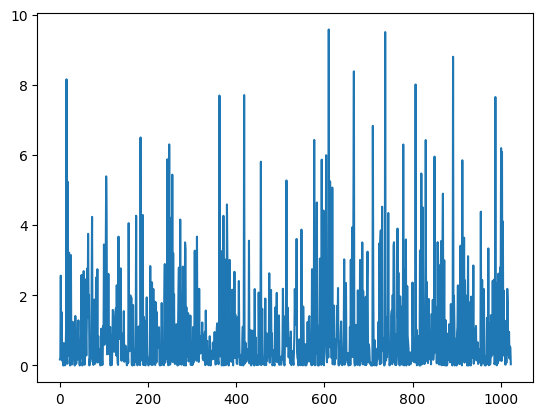

In [23]:
%matplotlib inline
plt.plot(DCT_series**2)

In [12]:
x = np.array([1, 2, 0, -1, 3, 0, 1, -1])

In [13]:
dct(x, norm='ortho')

array([ 1.76776695,  1.00633944, -0.34985438,  1.84506492, -0.35355339,
       -1.59776163, -1.76850273,  1.87887577])

In [4]:
np.sum(x**2)

17

In [7]:
np.sum(dct(x, norm='ortho')**2)

17.0

# AMP mode

In [6]:
# model=nn.Sequential(nn.Conv2d(2,3,3,padding=1),nn.ReLU(),nn.Linear(5,5))
# _input = torch.randn(1,2,5,5).cuda()
# target = torch.randn(1,3,5,5).cuda()
# torch.save({"_input":_input,"target":target,"model":model.state_dict()},"debug/data.pt")

In [21]:
import torch
from torch.cuda.amp import autocast,GradScaler
from model.GradientModifier import NGmod_absolute
import torch.nn as nn

data = torch.load("debug/data.pt")
_input = data["_input"]#torch.randn(1,2,5,5).cuda()
target = data["target"]#torch.randn(1,3,5,5).cuda()
grad_modifier = NGmod_absolute(1,0)
model=nn.Sequential(nn.Conv2d(2,3,3,padding=1),nn.ReLU(),nn.Linear(5,5))
model = model.cuda()
optimizer = torch.optim.SGD(model.parameters(), 0.1)
model.load_state_dict(data['model'])
# GradScaler对象用来自动做梯度缩放
scaler = GradScaler(enabled=True)
loss_fn= torch.nn.MSELoss()

optimizer.zero_grad()
# 在autocast enable 区域运行forward
with autocast():
    output = model(_input)
    loss = loss_fn(output, target)

# loss.backward()    
# grad_modifier.backward(model, _input, output)
# optimizer.step()

scaler.scale(loss).backward()
scaler.unscale_(optimizer)
with autocast():
    grad_modifier.backward(model, _input, output)
scaler.step(optimizer)
scaler.update()

In [31]:
def controlamp(use_amp):
    if use_amp:
        return autocast
    else:
        class fun():
            def __enter__(self):
                return self

            def __exit__(self, exc_type, exc_val, exc_tb):
                return True
        return fun

In [34]:
%%timeit 
with controlamp(0)():
    grad_modifier.backward(model, _input, output)

2.91 ms ± 99.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [35]:
%%timeit 
grad_modifier.backward(model, _input, output)

2.93 ms ± 94.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [37]:
%%timeit 
with autocast(): 
    grad_modifier.backward(model, _input, output)

3.05 ms ± 13 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [23]:
result_donot_useamp = model[0].weight.detach().cpu()

In [6]:
result_amp_gm_first = model[0].weight.detach().cpu()

In [4]:
result_amp_gm_later = model[0].weight.detach().cpu()

In [ ]:
result_amp_gm_none  = model[0].weight.detach().cpu()

In [24]:
result_donot_useamp[0,0]

tensor([[-0.2208, -0.2194, -0.0493],
        [ 0.1351, -0.2288,  0.2206],
        [-0.1380,  0.1213,  0.0129]])

In [11]:
result_amp_gm_first[0,0]

tensor([[-0.2208, -0.2194, -0.0493],
        [ 0.1351, -0.2288,  0.2206],
        [-0.1380,  0.1213,  0.0129]])

In [12]:
result_amp_gm_later[0,0]

tensor([[-0.2148, -0.2069, -0.0354],
        [ 0.1402, -0.2159,  0.2349],
        [-0.1359,  0.1294,  0.0219]])